# ASSIGNMENT :

### Importing the libraries and Data:

In [270]:
# Import the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline

# Ignoring the warnings:
import warnings
warnings.filterwarnings('ignore')

In [271]:
# Adjusting maximum rows and columns to 150:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

In [272]:
# Importing the data:
df_application = pd.read_csv('application_data.csv')
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Checking DataFrame:

Going through out the data to understand the dataset:

In [273]:
# Shape of DF:
df_application.shape

(307511, 122)

In [274]:
# Details about the columns:
df_application.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [275]:
# Numarical Summary of all columns:
df_application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### Data Cleaning

Finding the missing values and searching for best practice to solve to handle the missing value. Also handling the incorrectness of datatype. 

In [276]:
# Missing values in each column (in %):
round(100 * df_application.isnull().mean(),1)

SK_ID_CURR                       0.0
TARGET                           0.0
NAME_CONTRACT_TYPE               0.0
CODE_GENDER                      0.0
FLAG_OWN_CAR                     0.0
FLAG_OWN_REALTY                  0.0
CNT_CHILDREN                     0.0
AMT_INCOME_TOTAL                 0.0
AMT_CREDIT                       0.0
AMT_ANNUITY                      0.0
AMT_GOODS_PRICE                  0.1
NAME_TYPE_SUITE                  0.4
NAME_INCOME_TYPE                 0.0
NAME_EDUCATION_TYPE              0.0
NAME_FAMILY_STATUS               0.0
NAME_HOUSING_TYPE                0.0
REGION_POPULATION_RELATIVE       0.0
DAYS_BIRTH                       0.0
DAYS_EMPLOYED                    0.0
DAYS_REGISTRATION                0.0
DAYS_ID_PUBLISH                  0.0
OWN_CAR_AGE                     66.0
FLAG_MOBIL                       0.0
FLAG_EMP_PHONE                   0.0
FLAG_WORK_PHONE                  0.0
FLAG_CONT_MOBILE                 0.0
FLAG_PHONE                       0.0
F

In [277]:
# Creating a list of columns with more than 50% missing values and will drop these columns to prevent incorrectness in analysis:
missing_values = list(filter(lambda x: x[1] > 50 , round(100 * df_application.isnull().sum() / len(df_application.index),2).iteritems()))

unwanted_col = [i[0] for i in missing_values]
unwanted_col

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

##### Since the above columns have more than 45 % data missing, it would be wise to drop these columns because if we keep them, they would impact our overal analysis.

In [278]:
# Removing columns with more than 45% missing values:
df_application.drop(unwanted_col, axis = 1, inplace = True)
df_application.shape

(307511, 81)

In [279]:
# Percentage of missing values in the remaining columns:
round(100 * df_application.isnull().sum() / len(df_application.index),1)

SK_ID_CURR                       0.0
TARGET                           0.0
NAME_CONTRACT_TYPE               0.0
CODE_GENDER                      0.0
FLAG_OWN_CAR                     0.0
FLAG_OWN_REALTY                  0.0
CNT_CHILDREN                     0.0
AMT_INCOME_TOTAL                 0.0
AMT_CREDIT                       0.0
AMT_ANNUITY                      0.0
AMT_GOODS_PRICE                  0.1
NAME_TYPE_SUITE                  0.4
NAME_INCOME_TYPE                 0.0
NAME_EDUCATION_TYPE              0.0
NAME_FAMILY_STATUS               0.0
NAME_HOUSING_TYPE                0.0
REGION_POPULATION_RELATIVE       0.0
DAYS_BIRTH                       0.0
DAYS_EMPLOYED                    0.0
DAYS_REGISTRATION                0.0
DAYS_ID_PUBLISH                  0.0
FLAG_MOBIL                       0.0
FLAG_EMP_PHONE                   0.0
FLAG_WORK_PHONE                  0.0
FLAG_CONT_MOBILE                 0.0
FLAG_PHONE                       0.0
FLAG_EMAIL                       0.0
O

#### Imputing MISSING Values:

The OCCUPATION_TYPE" column is having 31.35% data missing. This is a categorical column and its missing value percentage is also high, so we can't use mode. We can do one thing that we can create a new type "Unknown" or "NaN" to fill the missing values:

There are columns with nearly 14% missing values, so here we can use some method to impute the missing values as these are not too high.

In [280]:
# The columns which are having missing values near 14%
df_application[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 
      'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


#### Checking DATA-TYPE:

Some columns are there with wrong data-type. So, we can change there data-type. For some column we cannot change the data-type because there will be some missing values in them.
 Columns are:
- AMT_REQ_CREDIT_BUREAU_HOUR
- AMT_REQ_CREDIT_BUREAU_DAY
- AMT_REQ_CREDIT_BUREAU_WEEK
- AMT_REQ_CREDIT_BUREAU_MON
- AMT_REQ_CREDIT_BUREAU_QRT
- AMT_REQ_CREDIT_BUREAU_YEAR

Similarly for DAYS_REGISTRATION column, we need to change it into int as it shows the number of days.

In [281]:
# DAYS_REGISTRATION column, we need to change it into int type because it shows no. of days:
df_application['DAYS_REGISTRATION'] = df_application['DAYS_REGISTRATION'].astype(int)

We can change the columns which represent Yes or No values as 0 and 1 into Category data type for better plotting and thus reading. 

In [282]:
# Changing Days column to integer type:
col_list = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
for i in col_list:
    df_application[i] = df_application[i].astype(int)

In [283]:
df_application[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','DAYS_REGISTRATION']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DAYS_BIRTH         307511 non-null  int32  
 1   DAYS_EMPLOYED      307511 non-null  int32  
 2   DAYS_REGISTRATION  307511 non-null  int32  
 3   DAYS_ID_PUBLISH    307511 non-null  int32  
 4   CNT_FAM_MEMBERS    307509 non-null  float64
 5   DAYS_REGISTRATION  307511 non-null  int32  
dtypes: float64(1), int32(5)
memory usage: 8.2 MB


#### Standardizing Data:
There are some columns which represent number of days but have some negative values. We need to fix that by replacing those values with their respective absolute values. The columns are:
- DAYS_BIRTH
- DAYS_EMPLOYED
- DAYS_REGISTRATION
- DAYS_ID_PUBLISH
- DAYS_LAST_PHONE_CHANGE

In [284]:
df_application[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,-16036.995067,63815.045904,-4986.120327,-2994.202373,-962.858788
std,4363.988632,141275.766519,3522.886321,1509.450419,826.808487
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000,-4292.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000,-1570.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000,-757.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000,-274.000000
max,-7489.000000,365243.000000,0.000000,0.000000,0.000000


In [285]:
# list for days columns:
col_list = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

# Changing each values to absolute values in the days columns:
for i in col_list:
    df_application[i] = abs(df_application[i])

df_application[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,16036.995067,67724.742149,4986.120327,2994.202373,962.858788
std,4363.988632,139443.751806,3522.886321,1509.450419,826.808487
min,7489.000000,0.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000,274.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000,757.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000,1570.000000
max,25229.000000,365243.000000,24672.000000,7197.000000,4292.000000


In [286]:
# CODE_GENDER:
df_application['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [287]:
# Replacing the unwanted value XNA by NaN:
df_application['CODE_GENDER'] = df_application['CODE_GENDER'].replace('XNA',np.nan)
df_application['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

### Finding Outliers:

There are numaric columns where we can check for outliers:
- AMT_INCOME_TOTAL
- AMT_CREDIT
- AMT_ANNUITY
- AMT_GOODS_PRICE
- DAYS_BIRTH
- DAYS_EMPLOYED
- DAYS_REGISTRATION

In [288]:
# FUNCTION FOR PLOTTING GRAPH:
def plotting_outiers(var,title,label):
    plt.figure(figsize = [7,4])
    plt.title(title, fontdict={'fontsize': 15, 'fontweight' : 6, 'color' : 'Green'})
    sns.boxplot(y = var)
    plt.ylabel(label, fontdict={'fontsize': 13, 'fontweight' : 6, 'color' : 'Blue'})
    plt.show()

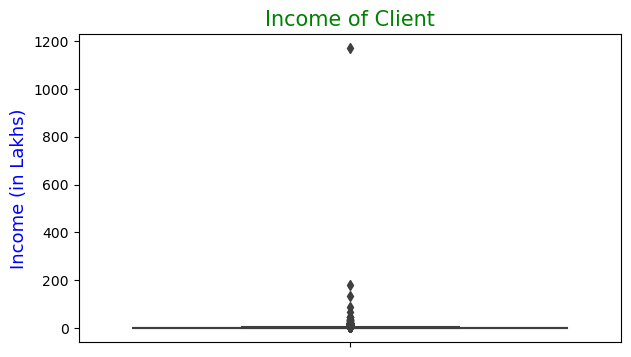

In [289]:
# Outliers in AMT_INCOME_TOTAL:
var = df_application['AMT_INCOME_TOTAL']/100000
title = "Income of Client"
label = 'Income (in Lakhs)'
plotting_outiers(var,title,label)

Here some of the values in AMT_INCOME_TOTAL(Income of the client) are very high income as compared to others. So we need to remove these values so that these values cannot hamper the analysis.

In [290]:
(df_application['AMT_INCOME_TOTAL']/100000).describe()

count    307511.000000
mean          1.687979
std           2.371231
min           0.256500
25%           1.125000
50%           1.471500
75%           2.025000
max        1170.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In "AMT_INCOME_TOTAL" there is a huge value difference between 75% and the maximum value. Let's print the quantile to check the difference between 0.95 or 0.99 quantile and the maximum value.

In [291]:
# Showing the quantiles for AMT_INCOME_TOTAL column:
(df_application['AMT_INCOME_TOTAL']/100000).quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    1.4715
0.70    1.8000
0.90    2.7000
0.95    3.3750
0.99    4.7250
Name: AMT_INCOME_TOTAL, dtype: float64

In AMT_INCOME_TOTAL there is a huge difference in 0.99 quantile and the maximum values. So, there are outliers.

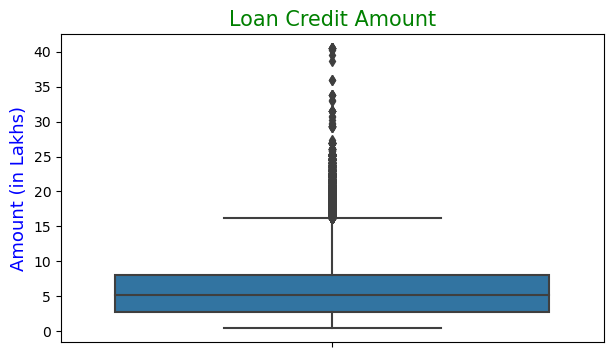

In [292]:
# Outlier analysis for AMT_CREDIT column:
var = df_application['AMT_CREDIT']/100000
title = "Loan Credit Amount"
label = "Amount (in Lakhs)"
plotting_outiers(var,title,label)

Here in the column "AMT_CREDIT" has some outliers. Since the amount credits can vary from person to person based on the loan applied, their eligibility and other factors, it is considerable.Also we have more applications with credit amount in the lower range below 5 lakhs.


In [293]:
(df_application['AMT_CREDIT']/100000).describe()

count    307511.000000
mean          5.990260
std           4.024908
min           0.450000
25%           2.700000
50%           5.135310
75%           8.086500
max          40.500000
Name: AMT_CREDIT, dtype: float64

We can see an increase in value after 75% but it is not very high. Let's check the quantiles.

In [294]:
# Quantile for AMT_CREDIT column:
(df_application['AMT_CREDIT']/100000).quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50     5.13531
0.70     7.55190
0.90    11.33748
0.95    13.50000
0.99    18.54000
Name: AMT_CREDIT, dtype: float64

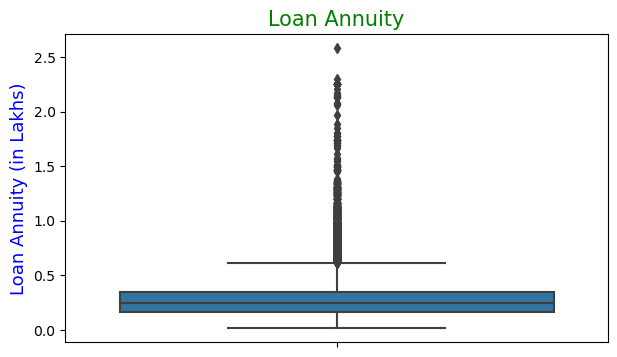

In [295]:
# Outlier analysis for  AMT_ANNUITY column:
var = df_application['AMT_ANNUITY']/100000
title = "Loan Annuity"
label = "Loan Annuity (in Lakhs)"
plotting_outiers(var,title,label)
# Here we have continuous outliers so nothing we need to do.

In [296]:
(df_application['AMT_ANNUITY']/100000).describe()

count    307499.000000
mean          0.271086
std           0.144937
min           0.016155
25%           0.165240
50%           0.249030
75%           0.345960
max           2.580255
Name: AMT_ANNUITY, dtype: float64

In this case as there is not a huge difference between 75% and the maximum value also the mean and median values are not much different , we can impute the outliers with median value.

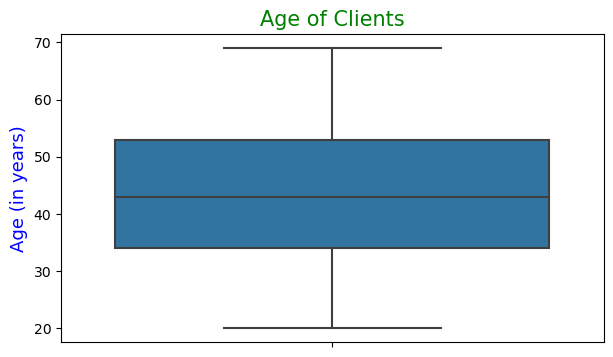

In [297]:
# Finding for Qutliers:

var = df_application['DAYS_BIRTH']//365
title = "Age of Clients"
label = "Age (in years)"

plotting_outiers(var,title,label)

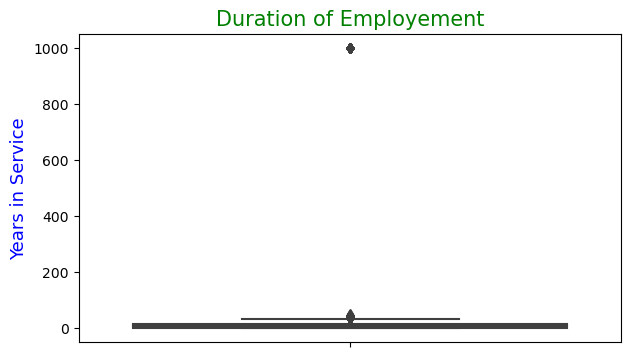

In [298]:
# Finding for Qutliers:
var = df_application['DAYS_EMPLOYED']//365
title = "Duration of Employement"
label = "Years in Service"
plotting_outiers(var,title,label)
# Employment duration contain huge outliers; Data points are showing close to 1000 yrs in servide and that is not possible.

In [299]:
(df_application['DAYS_EMPLOYED']/365).describe()
# There is surely a huge difference in 75% and the maximum value.

count    307511.000000
mean        185.547239
std         382.037676
min           0.000000
25%           2.556164
50%           6.079452
75%          15.635616
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

In [300]:
# Quantile for DAYS_EMPLOYED column:
(df_application['DAYS_EMPLOYED']/365).quantile([0.5, 0.7, 0.8,0.85, 0.9])

# In DAYS_EMPLOYED, we can see that there is no difference between 0.90 quantile and the maximum values; 
# Instead there is a huge difference between the 0.80 quantile and the maximum value; So we can say that there are near 20% data which is not correct or is outlier. 
# For this we can cap the value to 0.80 quantile.

0.50       6.079452
0.70      12.150685
0.80      25.172603
0.85    1000.665753
0.90    1000.665753
Name: DAYS_EMPLOYED, dtype: float64

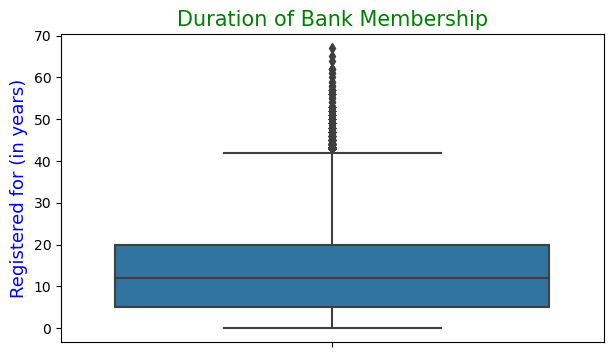

In [301]:
# Finding for Qutliers:
var = df_application['DAYS_REGISTRATION']//365
title = "Duration of Bank Membership"
label = "Registered for (in years)"
plotting_outiers(var,title,label)

Bank membership duration, we can see that we have some applicants with the bank for very long time , close to 70 years, which is rare but not impossible. There are people who tie up with a bank and stay loyal to the same one for life time.x

In [302]:
(df_application['DAYS_REGISTRATION']/365).describe()
# There is no much difference between mean & median. So here we can replace the outliers with median values.

count    307511.000000
mean         13.660604
std           9.651743
min           0.000000
25%           5.506849
50%          12.339726
75%          20.491781
max          67.594521
Name: DAYS_REGISTRATION, dtype: float64

#### Binning of values:

In [303]:
# DAYS_BIRTH:
(df_application['DAYS_BIRTH'] // 365).describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: DAYS_BIRTH, dtype: float64

In [304]:
# Binning DAYS_BIRTH column:

bins = [0,20,30,40,50,60,100]
labels = ['Below 20','20-30','30-40','40-50','50-60','Above 60']
df_application['AGE_GROUP'] = pd.cut(df_application['DAYS_BIRTH'] // 365, bins = bins, labels = labels )


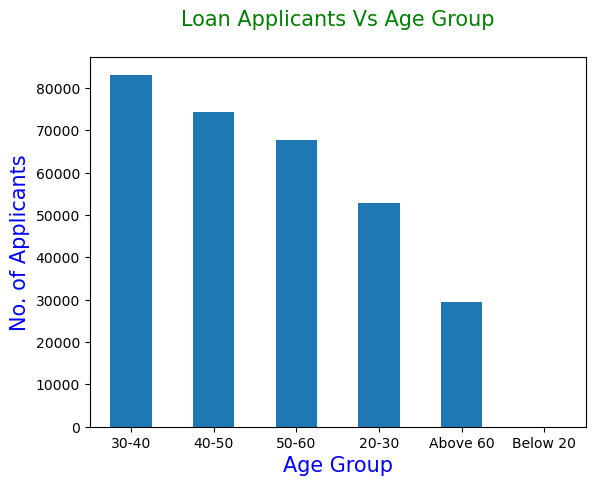

In [305]:
# Checking the values

df_application['AGE_GROUP'].value_counts().plot(kind='bar')
plt.title("Loan Applicants Vs Age Group\n", fontdict={'fontsize': 15, 'fontweight' : 6, 'color' : 'Green'})
plt.ylabel('No. of Applicants', fontdict={'fontsize': 15, 'fontweight' : 6, 'color' : 'Blue'})
plt.xlabel('Age Group', fontdict={'fontsize': 15, 'fontweight' : 6, 'color' : 'Blue'})
plt.xticks(rotation=0)
plt.show()

From above graph we can get that the maximum no. of loan application are from 30-40 year age group.

In [306]:
# AMT_INCOME_TOTAL:
(df_application['AMT_INCOME_TOTAL']/100000).describe()

count    307511.000000
mean          1.687979
std           2.371231
min           0.256500
25%           1.125000
50%           1.471500
75%           2.025000
max        1170.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [307]:
# We are Binning AMT_INCOME_TOTAL column and changing it in Lakhs to make data more readable:
bins = [0,1,2,5,10,20,50,1000]
labels = ['Upto 1L','1-2L','2-5L','5-10L','10-20L','20-50L','50L above']
df_application['INCOME_GROUP'] = pd.cut(df_application['AMT_INCOME_TOTAL'] / 100000, bins = bins, labels = labels )

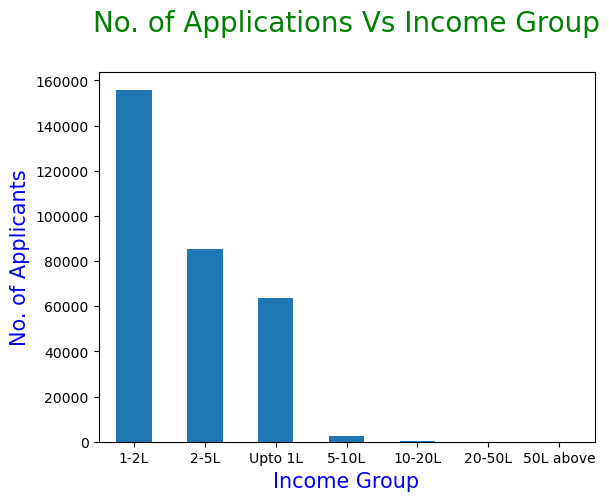

In [308]:
df_application['INCOME_GROUP'].value_counts().plot(kind='bar')
plt.title("No. of Applications Vs Income Group\n", fontdict={'fontsize': 20, 'fontweight' : 6, 'color' : 'Green'})
plt.ylabel('No. of Applicants', fontdict={'fontsize': 15, 'fontweight' : 6, 'color' : 'Blue'})
plt.xlabel('Income Group', fontdict={'fontsize': 15, 'fontweight' : 6, 'color' : 'Blue'})
plt.xticks(rotation=0)
plt.show()

Maximum loan applicants are from lower income group i.e upto 5 lakhs. Bank should focus on this group.Also, we can cap the value at 20L.

In [309]:
# AMT_CREDIT:
(df_application['AMT_CREDIT']/100000).describe()

count    307511.000000
mean          5.990260
std           4.024908
min           0.450000
25%           2.700000
50%           5.135310
75%           8.086500
max          40.500000
Name: AMT_CREDIT, dtype: float64

In [310]:
# Categorizing the credit amount of loan -> AMT_CREDIT column:
bins = [0,1,5,10,20,30,40,50,100]
labels = ['Upto 1L','1-5L','5-10L','10-20L','20-30L','30-40L','40-50L','50L above']
df_application['CREDIT_GROUP'] = pd.cut(df_application['AMT_CREDIT'] / 100000, bins = bins, labels = labels )

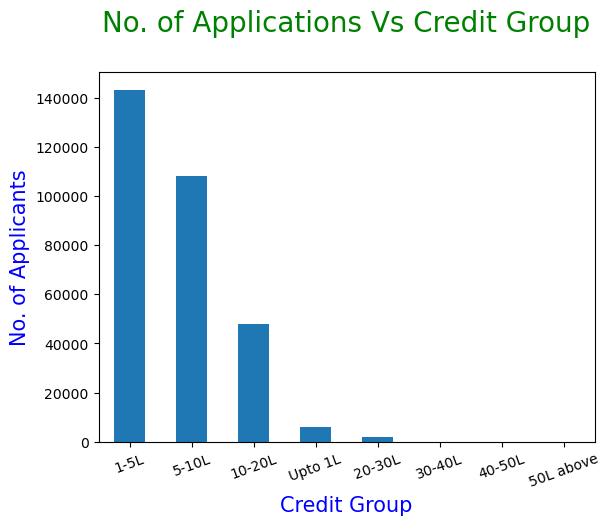

In [311]:
df_application['CREDIT_GROUP'].value_counts().plot(kind='bar')
plt.title("No. of Applications Vs Credit Group\n", fontdict={'fontsize': 20, 'fontweight' : 6, 'color' : 'Green'})
plt.ylabel('No. of Applicants', fontdict={'fontsize': 15, 'fontweight' : 6, 'color' : 'Blue'})
plt.xlabel('Credit Group', fontdict={'fontsize': 15, 'fontweight' : 6, 'color' : 'Blue'})
plt.xticks(rotation=20)
plt.show()

There are more no. of credit amounts between 1Lac. to 20 Lac. And there is no application above 30 Lacs.

====================================================================================================================

## Analysis Part:

####  Imbalance Percentage checking:

In [312]:
# In our "TARGET" column some are defaulters and some are not, so checking the % of defaulters and the non defaulters:
repay_status = df_application['TARGET'].value_counts(normalize=True)*100
repay_status

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

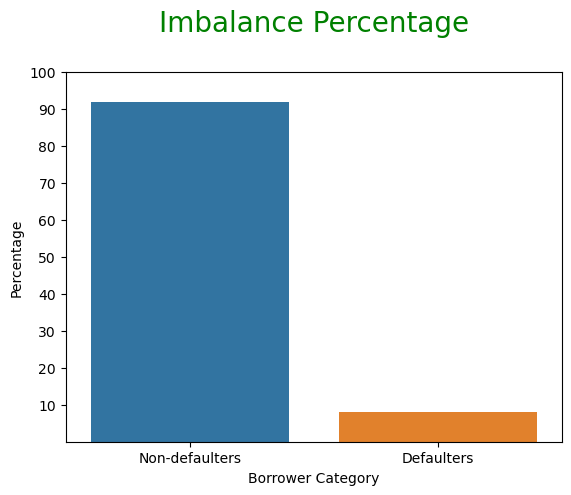

In [313]:
# Graph for Defaulter and non-defaulter percentage of defaulting:
x_val= ['Non-defaulters','Defaulters']
axes= plt.axes()
axes.set_ylim([0,100])
axes.set_yticks([10,20,30,40,50,60,70,80,90,100])

sns.barplot(x= x_val, y=repay_status)
plt.title('Imbalance Percentage\n', fontdict={'fontsize': 20, 'fontweight' : 6, 'color' : 'Green'})
plt.xlabel("Borrower Category")
plt.ylabel("Percentage")

plt.show()

As per the above data, we can say that our data set is imbalanced with almost 8% defaulters. Rest all 92% were able to repay the loans.

In [314]:
# Now creating 2 dataFrame one for defaulter and another for non-defaulters
# Non-Defaulters dataframe:
application_df_non_def = df_application[df_application['TARGET']==0]
application_df_non_def.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,INCOME_GROUP,CREDIT_GROUP
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,40-50,2-5L,10-20L
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50-60,Upto 1L,1-5L
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,50-60,1-2L,1-5L
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50-60,1-2L,5-10L
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970,477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,40-50,Upto 1L,1-5L


In [315]:
# Defaulters dataframe:
application_df_def = df_application[df_application['TARGET']==1]
application_df_def.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,INCOME_GROUP,CREDIT_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,20-30,2-5L,1-5L
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,2628,6573,1827,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,0.9732,0.0417,0.9732,0.0417,0.9732,0.0417,0.0085,Yes,10.0,1.0,10.0,0.0,161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,50-60,1-2L,5-10L
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182,1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.9960,0.2500,0.9960,0.2500,0.9960,0.2500,0.1463,No,0.0,0.0,0.0,0.0,1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,40-50,2-5L,10-20L
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,3597,45,4409,1,1,1,1,1,0,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,30-40,1-2L,1-5L
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,24794,365243,5391,4199,1,0,0,1,0,0,NaN,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,0.720944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Above 60,Upto 1L,1-5L


#### Univariate Analysis

##### Categorical Columns:

In [316]:
# Function for plotting graphs for univarient analysis:
def uni_categorical_grph(category1, category2, x_label):
    
    plt.figure(figsize = [15,7])
    plt.subplot(1,2,1)
    sns.countplot(category1)
    plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 6, 'color' : 'Green'})
    plt.x_label(x_label)
    plt.xticks(rotation=45, ha='right')
    plt.subplot(1,2,2)
    sns.countplot(category2)
    plt.title('Non-defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 6, 'color' : 'Green'})
    plt.x_label(x_label)
    plt.xticks(rotation=30, ha='right')
    plt.show()

In [388]:
# Defining a function to plot defaulter percentage against univariate categorical variable
def defaulter_perc_ploting(x_plot, y_plot, title, x_label):
    df_temporary = df_application[[x_plot,y_plot]].groupby([y_plot], as_index=False).mean()
    df_temporary[x_plot] = df_temporary[x_plot]*100
    df_temporary.sort_values(by=x_plot, ascending=False, inplace=True)

    sns.barplot(x=y_plot, y = x_plot, data = df_temporary)
    plt.title(title, fontdict={'fontsize': 20, 'fontweight' : 6, 'color' : 'Green'})
    plt.xlabel(x_label)
    plt.ylabel('Defaulter (in %)')
    plt.xticks(rotation=0)
    plt.show()


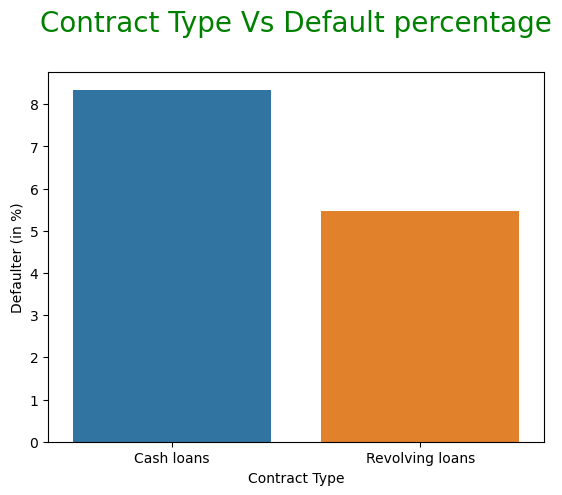

In [389]:
# Graph for percentage of defaulters in each contract type:

x_plot = 'TARGET'
y_plot = 'NAME_CONTRACT_TYPE'
title = 'Contract Type Vs Default percentage\n'
x_label = 'Contract Type'

defaulter_perc_ploting(x_plot, y_plot, title, x_label)

The "Cash loan" contract type are more likely to fail repayment

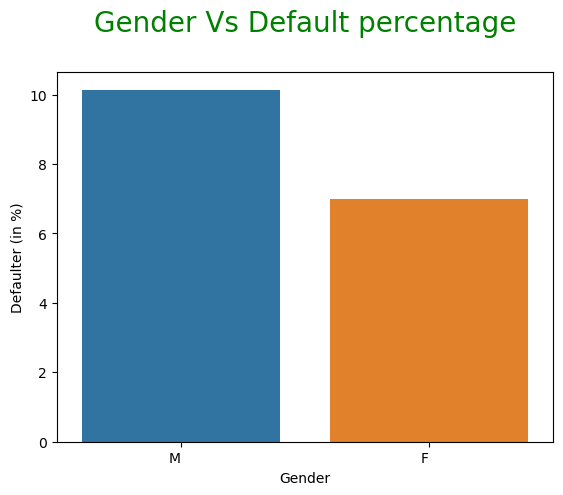

In [383]:
# Gender vs Defaulter percentage graph:
x_plot = 'TARGET'
y_plot = 'CODE_GENDER'
title = 'Gender Vs Default percentage\n'
xlabel = 'Gender'
defaulter_perc_ploting(x_plot, y_plot, title, xlabel)


From the above graph we got the idea that males are having high percentage to be defaulter.

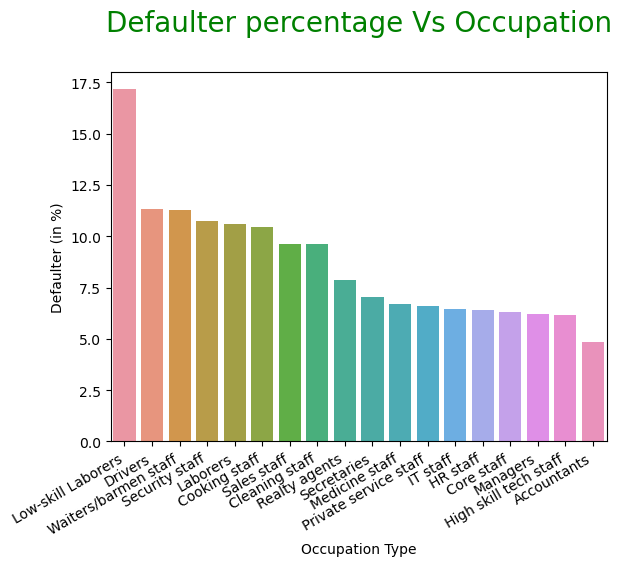

In [320]:
# Graph to showcase the occupation vs defaulter
x_plot = 'TARGET'
y_plot = 'OCCUPATION_TYPE'
title = 'Defaulter percentage Vs Occupation\n'
x_label = 'Occupation Type'

defaulter_perc_ploting(x_plot, y_plot, title, x_label)

From the above graph we can conclude that the low-skilled laborers are most likely to be a defaulter for loan.

Peoples who are in maternity leave and unemployed categories are more likely to fail to pay back the loan amount. One important thing here is we get to know that the businessman and students are less likely to be defaulter.

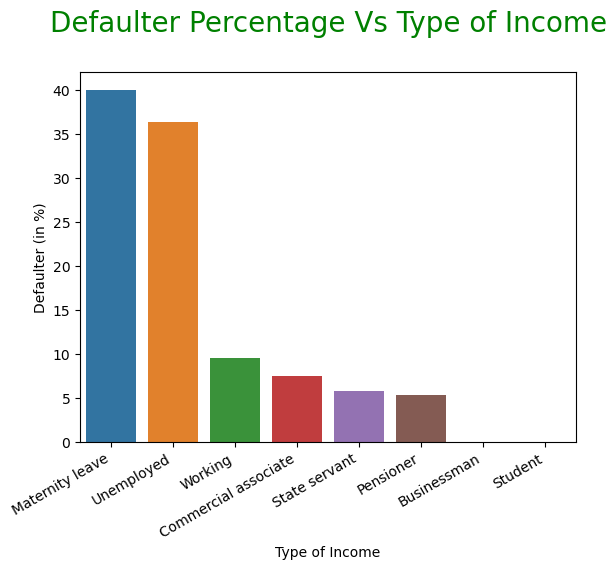

In [321]:
# Graph for Income type vs default %:

x_plot = 'TARGET'
y_plot = 'NAME_INCOME_TYPE'
title = 'Defaulter Percentage Vs Type of Income\n'
x_label = 'Type of Income'

defaulter_perc_ploting(x_plot, y_plot, title, x_label)


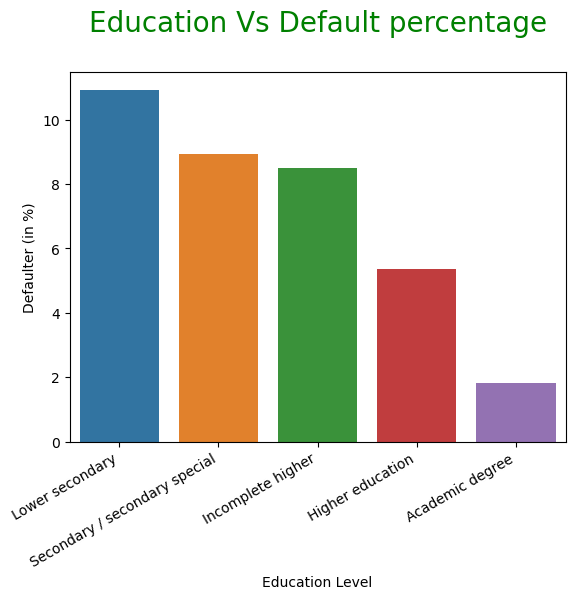

In [322]:
# Graph of NAME_EDUCATION_TYPE column:
x_plot = 'TARGET'
y_plot = 'NAME_EDUCATION_TYPE'
title = 'Education Vs Default percentage\n'
x_label = 'Education Level'

defaulter_perc_ploting(x_plot, y_plot, title, x_label)


The people with lower secondary education level are more likely to not payback the loan amount. The people with academic degree or higher education mostly payback the loan amount.

People with civil marriage and those who are single are more likely to be defaulter in paying the loan amount.

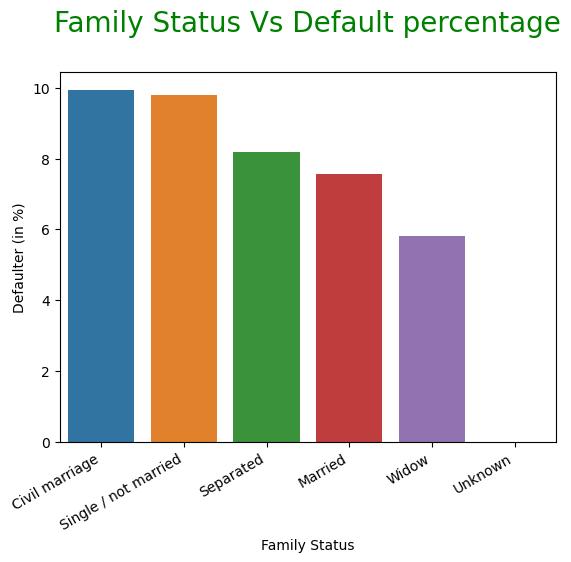

In [381]:
# Graph NAME_FAMILY_STATUS:
x_plot = 'TARGET'
y_plot = 'NAME_FAMILY_STATUS'
title = 'Family Status Vs Default percentage\n'
x_label = 'Family Status'

defaulter_perc_ploting(x_plot, y_plot, title, x_label)

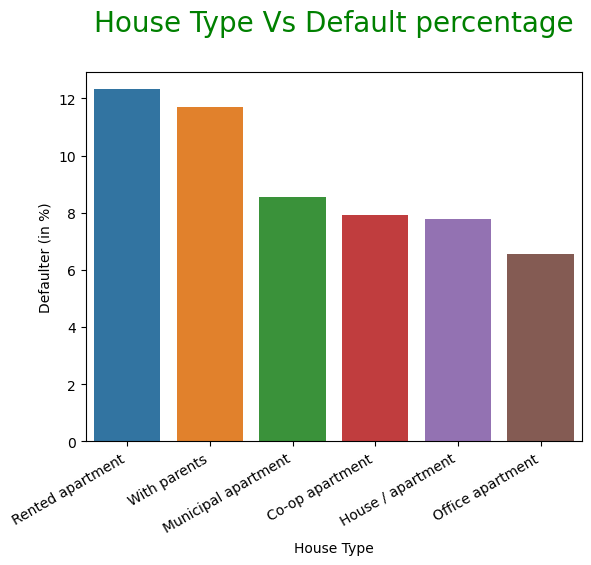

In [324]:
# Plot the percentage of defaulters in each category

x_plot = 'TARGET'
y_plot = 'NAME_HOUSING_TYPE'
title = 'House Type Vs Default percentage\n'
xlabel = 'House Type'

defaulter_perc_ploting(x_plot, y_plot, title, xlabel)

Most of the applicants who are likely to default are either staying in a rented apartment or with parents compared to other housing types.

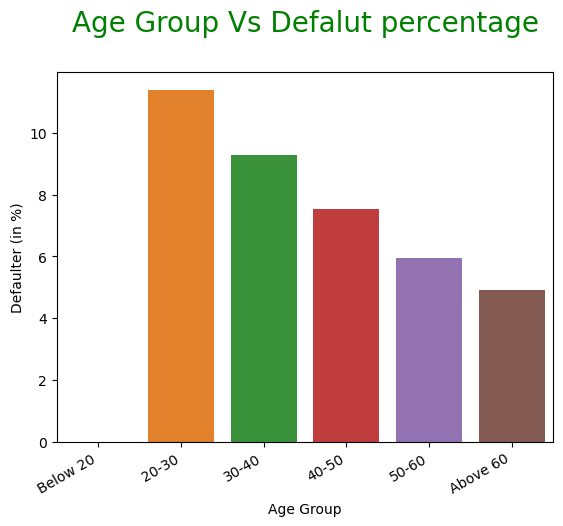

In [325]:
# Graph of percentage of defaulters:
x_plot = 'TARGET'
y_plot = 'AGE_GROUP'
title = 'Age Group Vs Defalut percentage\n'
x_label = 'Age Group'

defaulter_perc_ploting(x_plot, y_plot, title, x_label)

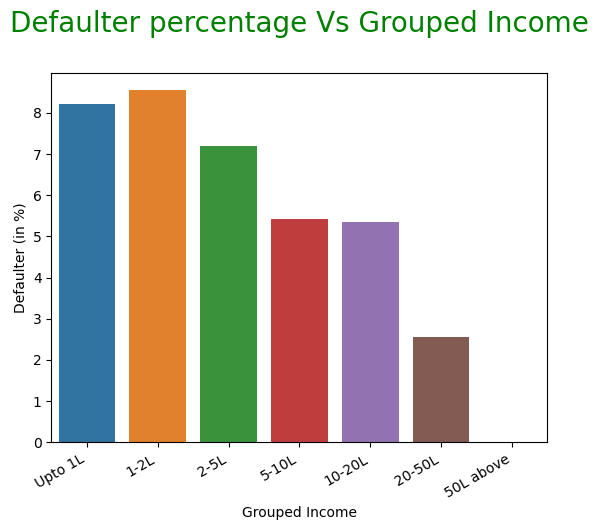

In [326]:
# Plot the percentage of defaulters in each category

x_plot = 'TARGET'
y_plot = 'INCOME_GROUP'
title = 'Defaulter percentage Vs Grouped Income\n'
x_label = 'Grouped Income'

defaulter_perc_ploting(x_plot, y_plot, title, x_label)

The lesser the income the higher the chances of defaulting. From the above graph we can conclude that maximum defaulters are in salary range of 1 lacs to 2 lacs.

From the above graph we can conclude that the loan defaulter are mostly in the age group of 20-30 age; And the defaulter percentage decreases with increase in the age.

##### Continuous column:

In [327]:
# Function for continuous column graph:

def univariate_numerical_plots(x_plot, y_plot, title, x_label):
    sns.distplot(x_plot , hist=False, label='Defaulters')
    sns.distplot(y_plot , hist=False, label='Non-defaulters')
    plt.title(title, fontdict={'fontsize': 20, 'fontweight' : 6, 'color' : 'Green'})
    plt.xlabel(x_label)
    plt.legend()
    plt.show()

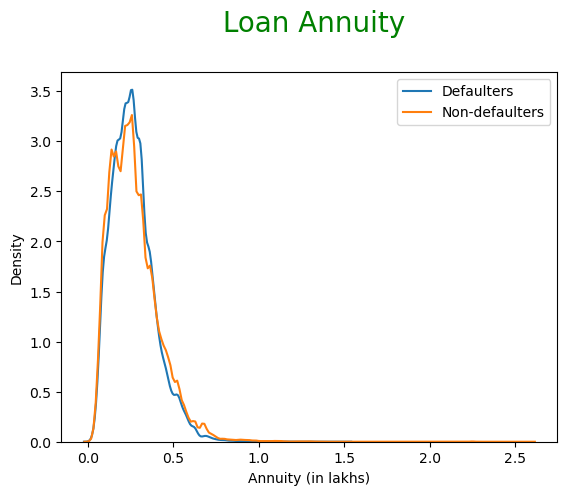

In [328]:
# Graph AMT_ANNUITY: 
x_plot = application_df_def['AMT_ANNUITY']/100000
y_plot = application_df_non_def['AMT_ANNUITY']/100000
title = ' Loan Annuity\n'
x_label = 'Annuity (in lakhs)'

univariate_numerical_plots(x_plot, y_plot, title, x_label)
# Almost all the loan annuity is less thn 1 Lacs.

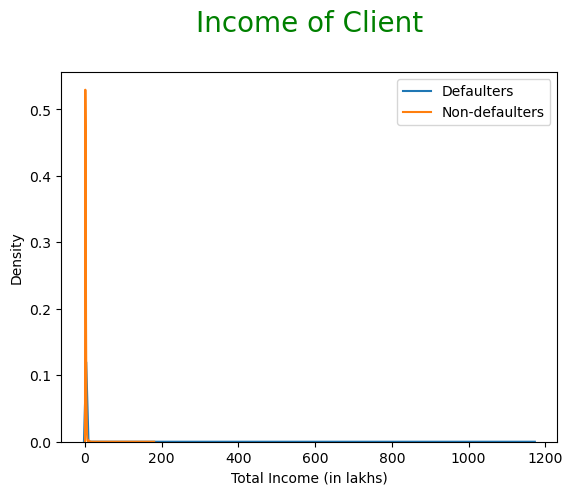

In [329]:
# Plotting AMT_INCOME_TOTAL:
x_plot = application_df_def['AMT_INCOME_TOTAL']/100000
y_plot = application_df_non_def['AMT_INCOME_TOTAL']/100000
title = 'Income of Client\n'
xlabel = 'Total Income (in lakhs)'
univariate_numerical_plots(x_plot, y_plot, title, xlabel)

# Almost all the applicants are in the lower range of salary.

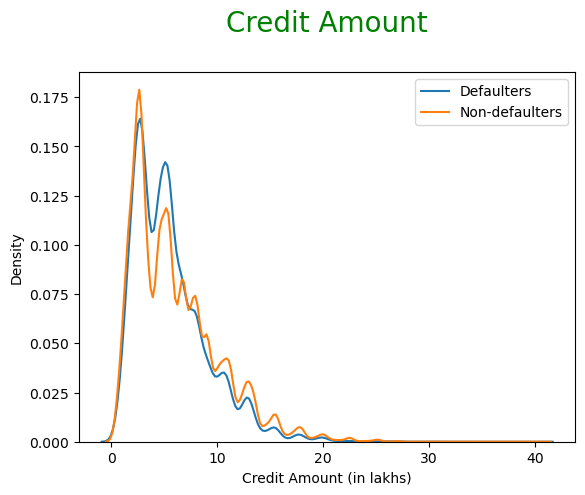

In [330]:
# Plotting AMT_CREDIT:
x_plot = application_df_def['AMT_CREDIT']/100000
y_plot = application_df_non_def['AMT_CREDIT']/100000
title = 'Credit Amount\n'
x_label = 'Credit Amount (in lakhs)'

univariate_numerical_plots(x_plot, y_plot, title, x_label)
# Maxmimum amount of loans are given with credit amount less than 20 Lacs.

The graph is right-skewed graph. Here most of the amount in a short range.

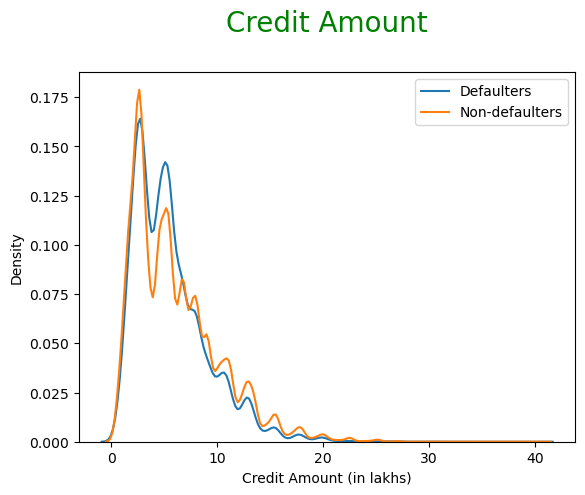

In [331]:
# Plotting DAYS_BIRTH 

x_plot = application_df_def['AMT_CREDIT']/100000
y_plot = application_df_non_def['AMT_CREDIT']/100000
title = 'Credit Amount\n'
x_label = 'Credit Amount (in lakhs)'
univariate_numerical_plots(x_plot, y_plot, title, x_label)

# Maxmimum amount of loans are given with credit amount less than 20 Lacs.

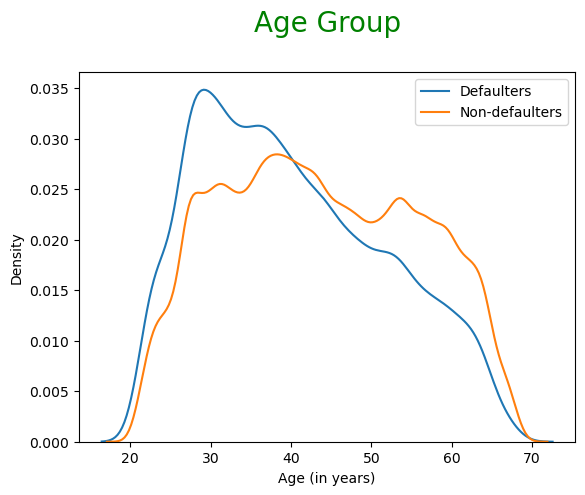

In [332]:
# Graph for DAYS_BIRTH:
x_plot = application_df_def['DAYS_BIRTH']//365
y_plot = application_df_non_def['DAYS_BIRTH']//365
title = 'Age Group\n'
x_label = 'Age (in years)'
univariate_numerical_plots(x_plot, y_plot, title, x_label)
# The defaulters are more in the age group of 30 to 40 and after that defaulter chances decreases.

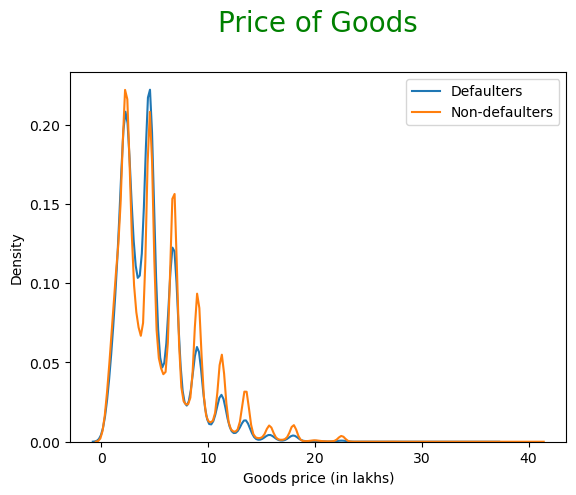

In [333]:
# Plotting AMT_GOODS_PRICE:
x_plot = application_df_def['AMT_GOODS_PRICE']/100000
y_plot = application_df_non_def['AMT_GOODS_PRICE']/100000
title = 'Price of Goods\n'
x_label = 'Goods price (in lakhs)'
univariate_numerical_plots(x_plot, y_plot, title, x_label)

# The most of the amount of goods are less than 20 lacs.

#### Correlation Matrix:

In [334]:
corr_defaulter_df = application_df_def[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_CHILDREN']].corr()
corr_defaulter_df

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_CHILDREN
AMT_INCOME_TOTAL,1.000000,0.038131,0.046421,0.037583,-0.003096,-0.014977,0.004796
AMT_CREDIT,0.038131,1.000000,0.752195,0.983103,0.135316,0.001930,-0.001675
AMT_ANNUITY,0.046421,0.752195,1.000000,0.752699,0.014303,-0.081207,0.031257
AMT_GOODS_PRICE,0.037583,0.983103,0.752699,1.000000,0.135810,0.006642,-0.008112
DAYS_BIRTH,-0.003096,0.135316,0.014303,0.135810,1.000000,0.582185,-0.259109
DAYS_EMPLOYED,-0.014977,0.001930,-0.081207,0.006642,0.582185,1.000000,-0.192864
CNT_CHILDREN,0.004796,-0.001675,0.031257,-0.008112,-0.259109,-0.192864,1.000000


In [335]:
corr_non_defaulter_df = application_df_non_def[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_CHILDREN']].corr()
corr_non_defaulter_df

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_CHILDREN
AMT_INCOME_TOTAL,1.000000,0.342799,0.418953,0.349462,-0.062609,-0.140392,0.027397
AMT_CREDIT,0.342799,1.000000,0.771309,0.987250,0.047378,-0.070104,0.003081
AMT_ANNUITY,0.418953,0.771309,1.000000,0.776686,-0.012263,-0.104978,0.020905
AMT_GOODS_PRICE,0.349462,0.987250,0.776686,1.000000,0.044565,-0.068609,-0.000525
DAYS_BIRTH,-0.062609,0.047378,-0.012263,0.044565,1.000000,0.626114,-0.336966
DAYS_EMPLOYED,-0.140392,-0.070104,-0.104978,-0.068609,0.626114,1.000000,-0.245174
CNT_CHILDREN,0.027397,0.003081,0.020905,-0.000525,-0.336966,-0.245174,1.000000


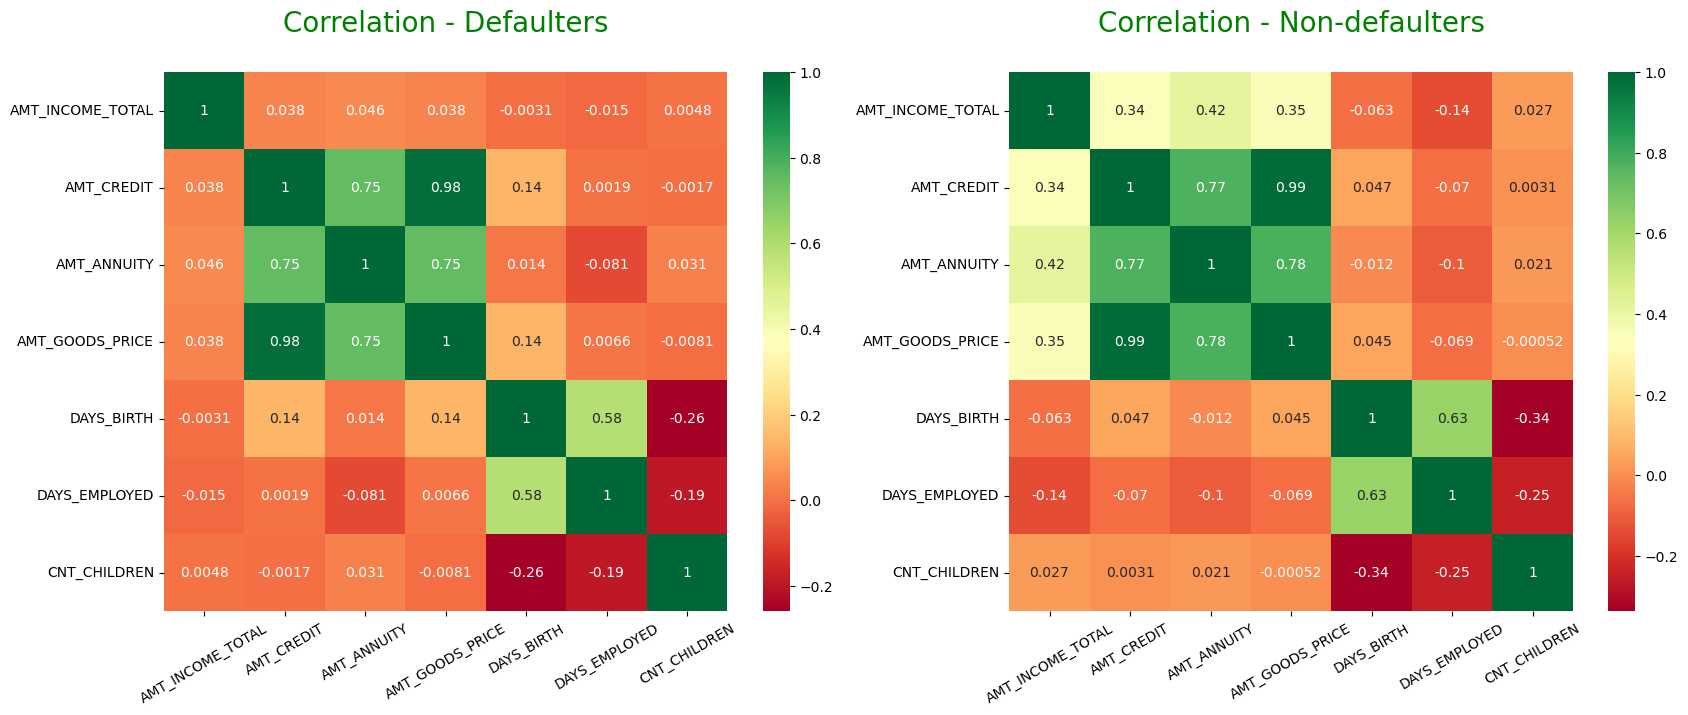

In [336]:
# Heatmap for the continuous column:

plt.figure(figsize=[20,7])

plt.subplot(1,2,1)
sns.heatmap(corr_defaulter_df, cmap="RdYlGn", annot = True)
plt.title('Correlation - Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 6, 'color' : 'Green'})
plt.xticks(rotation=30)

plt.subplot(1,2,2)
sns.heatmap(corr_non_defaulter_df, cmap="RdYlGn", annot = True)
plt.title('Correlation - Non-defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 6, 'color' : 'Green'})
plt.xticks(rotation=30)

plt.show()

The Credit amount (AMT_CREDIT) is strongly correlated to Amount Annuity (AMT_ANNUITY) and Amount of goods for which they are taking loan (AMT_GOODS_PRICE) in both the heatmap.

#### 	Bivariate Analysis:

##### Categorical - Continuous Analysis

In [337]:
# FUNCTION for categorical - Continuous column:
def catagorical_vs_continuous_plot(x_var, y_var, x_label, ylabel):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 6, 'color' : 'Green'})
    sns.boxplot(x=x_var,y=y_var, data=application_df_def)
    plt.xlabel(x_label)
    plt.ylabel(ylabel)
    plt.xticks(rotation=20)
    
    plt.subplot(1,2,2)
    plt.title('Non-Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 6, 'color' : 'Green'})
    sns.boxplot(x=x_var,y=y_var, data=application_df_non_def)
    plt.xlabel(x_label)
    plt.ylabel(ylabel)
    plt.xticks(rotation=20)
    plt.show()

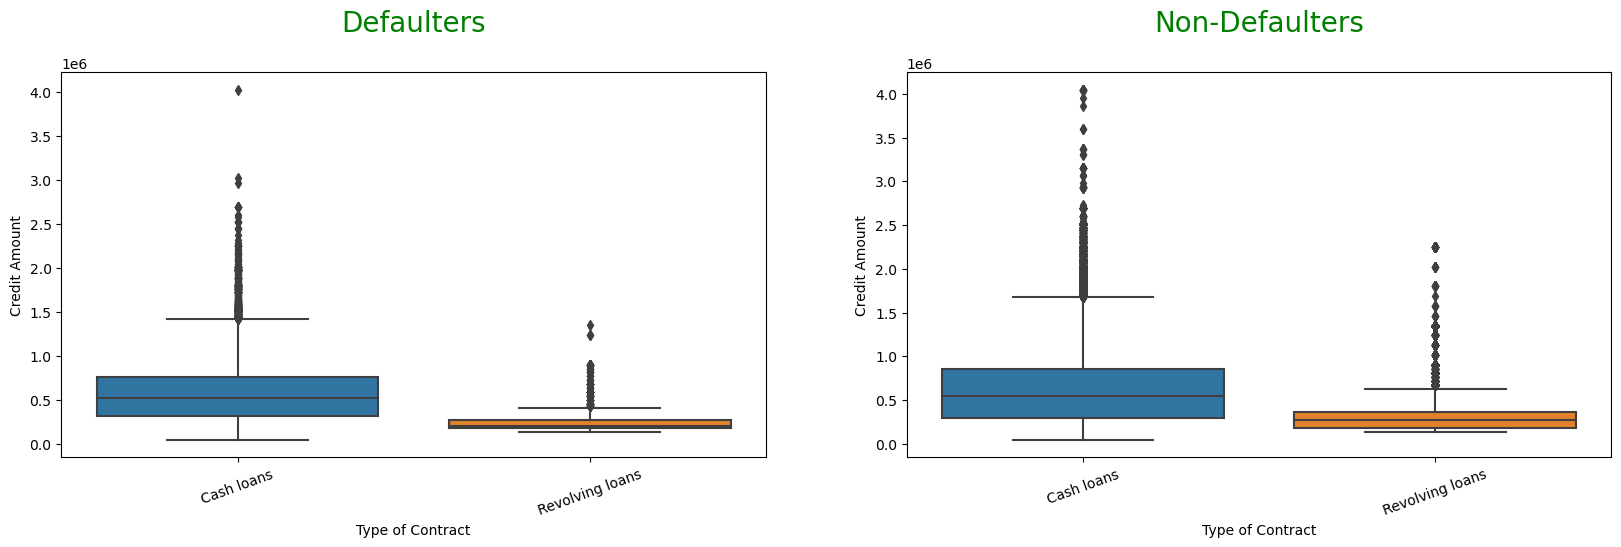

In [338]:
# Graph between NAME_CONTRACT_TYPE - AMT_CREDIT column:
x_var = 'NAME_CONTRACT_TYPE'
y_var = 'AMT_CREDIT'
x_label = 'Type of Contract'
y_label = 'Credit Amount'
catagorical_vs_continuous_plot(x_var, y_var, x_label, y_label)

From above graph we got the clear idea that the Loan credit amount for cash loan is higher than that of revolving loans.

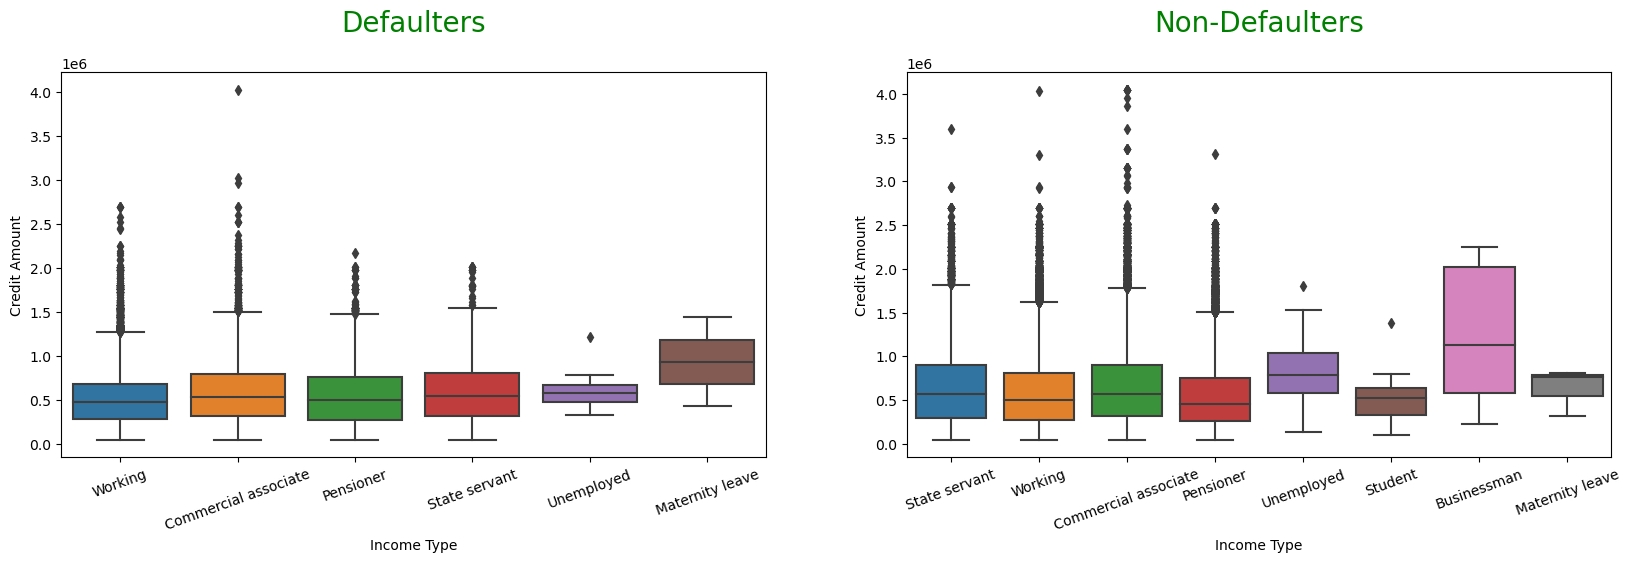

In [339]:
# Graph between NAME_INCOME_TYPE - AMT_CREDIT columns:
x_var = 'NAME_INCOME_TYPE'
y_var = 'AMT_CREDIT'
xlabel = 'Income Type'
ylabel = 'Credit Amount'

catagorical_vs_continuous_plot(x_var, y_var, xlabel, ylabel)

From the above graph we can conclude that the businessman income type people are taking higher loan amount then the other clients. One more thing is there that is the people with maternity leave income type are more likely to be defaulter.

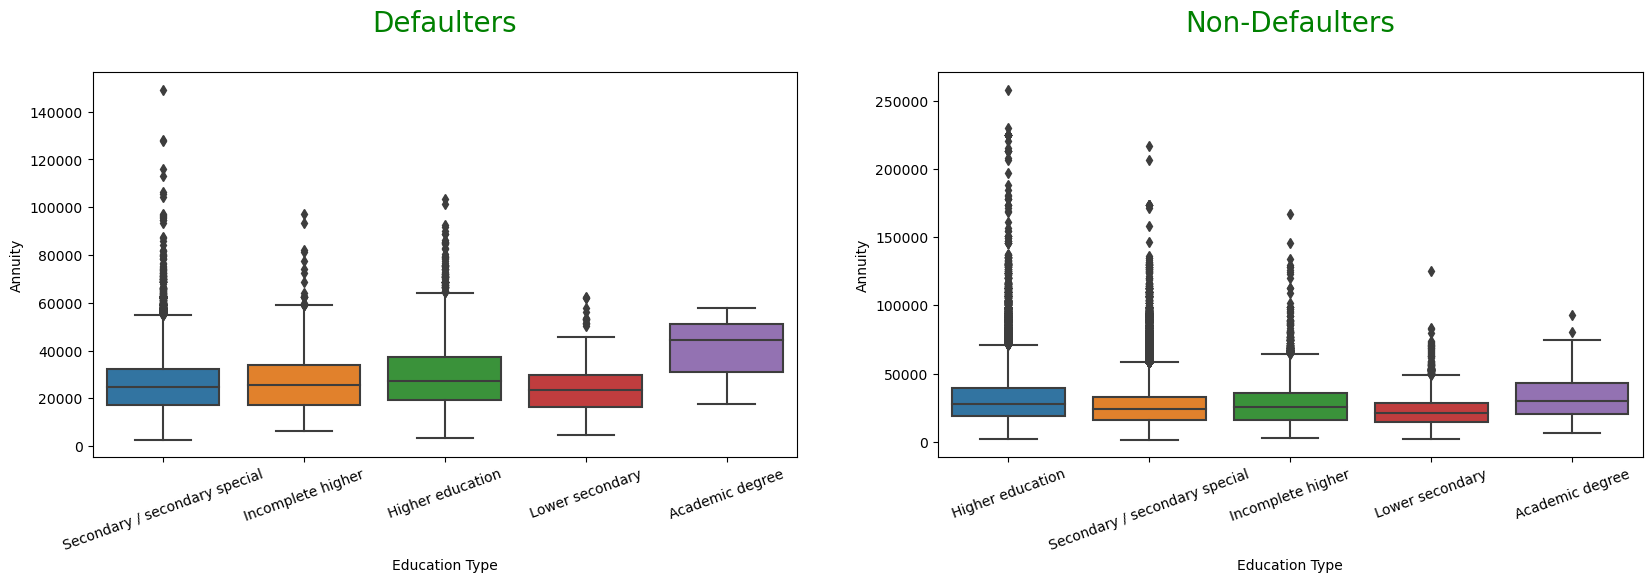

In [340]:
# Graphs for NAME_EDUCATION_TYPE - AMT_ANNUITY columns:
x_var = 'NAME_EDUCATION_TYPE'
y_var = 'AMT_ANNUITY'
xlabel = 'Education Type'
ylabel = 'Annuity'
catagorical_vs_continuous_plot(x_var, y_var, xlabel, ylabel)

The clients with academic degree and higher education are having more loan annuity amount compared to other groups.

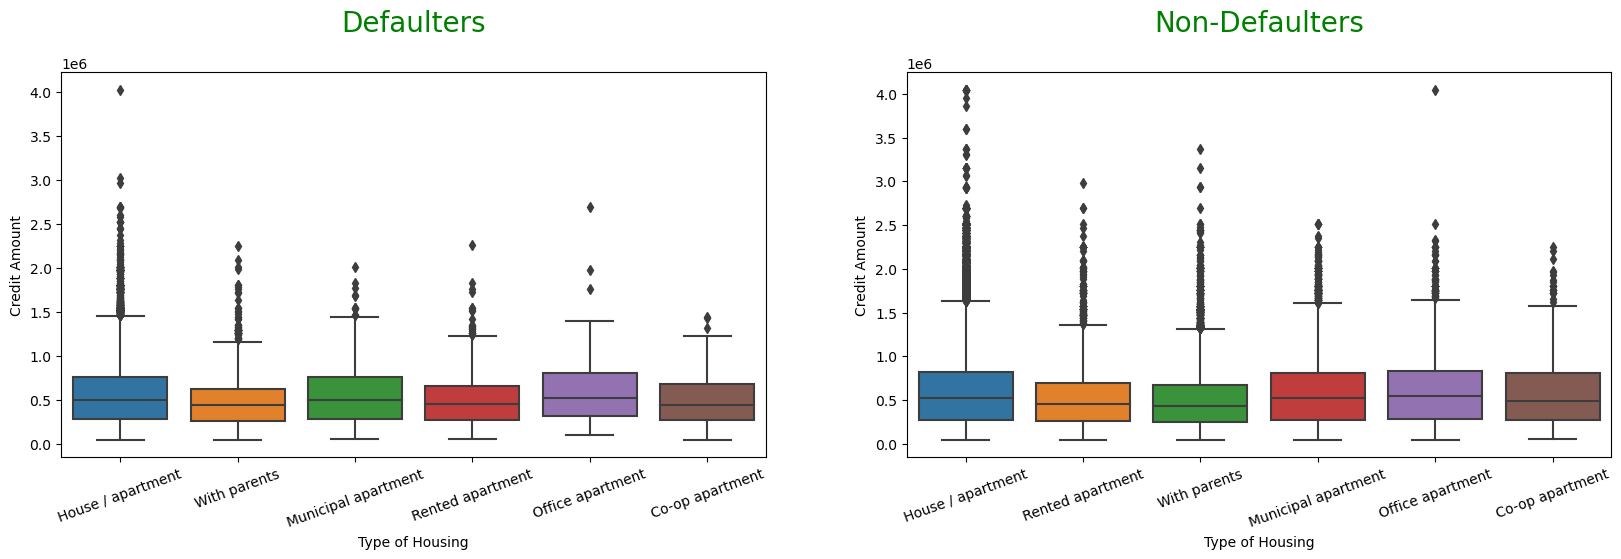

In [341]:
# Graph for NAME_HOUSING_TYPE - AMT_CREDIT column:

x_var = 'NAME_HOUSING_TYPE'
y_var = 'AMT_CREDIT'
xlabel = 'Type of Housing'
ylabel = 'Credit Amount'

catagorical_vs_continuous_plot(x_var, y_var, xlabel, ylabel)

The clients living in houses/apartment, office apartments and municipal is quite higher.

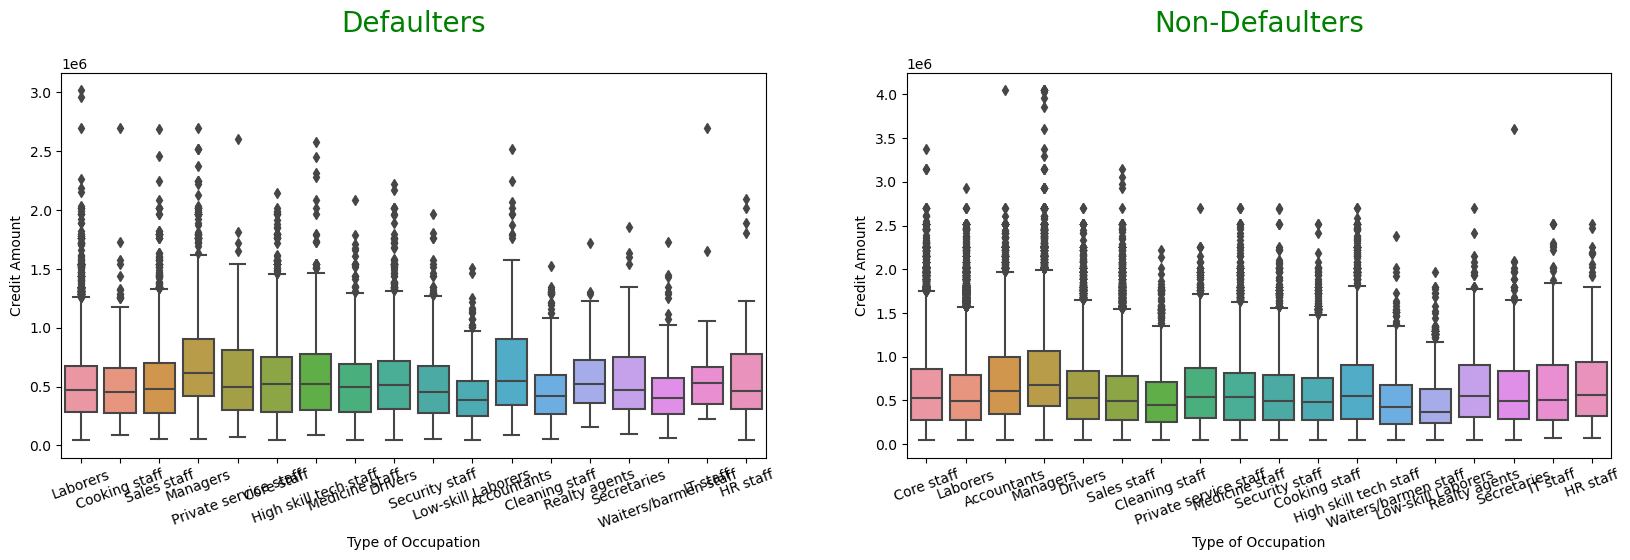

In [342]:
# Graph for OCCUPATION_TYPE - AMT_CREDIT column:

x_var = 'OCCUPATION_TYPE'
y_var = 'AMT_CREDIT'
x_label = 'Type of Occupation'
ylabel = 'Credit Amount'
catagorical_vs_continuous_plot(x_var, y_var, x_label, ylabel)

The people from labour class are much more likely to de defaulter. And people who are managers and accountants are crediting high amount. 

In [343]:
# Function for Continuous - continuous graph:

def continuous_vs_continuous_graph(x_plot, y_plot, x_label, ylabel):
    plt.figure(figsize=[20,5])
    plt.subplot(1,2,1)
    plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 6, 'color' : 'Green'})
    sns.scatterplot(x = x_plot, y = y_plot, data = application_df_def)
    plt.xlabel(x_label)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)

    plt.subplot(1,2,2)
    plt.title('Non-defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 6, 'color' : 'Green'})
    sns.scatterplot(x = x_plot, y = y_plot, data = application_df_non_def)
    plt.xlabel(x_label)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    
    plt.show()

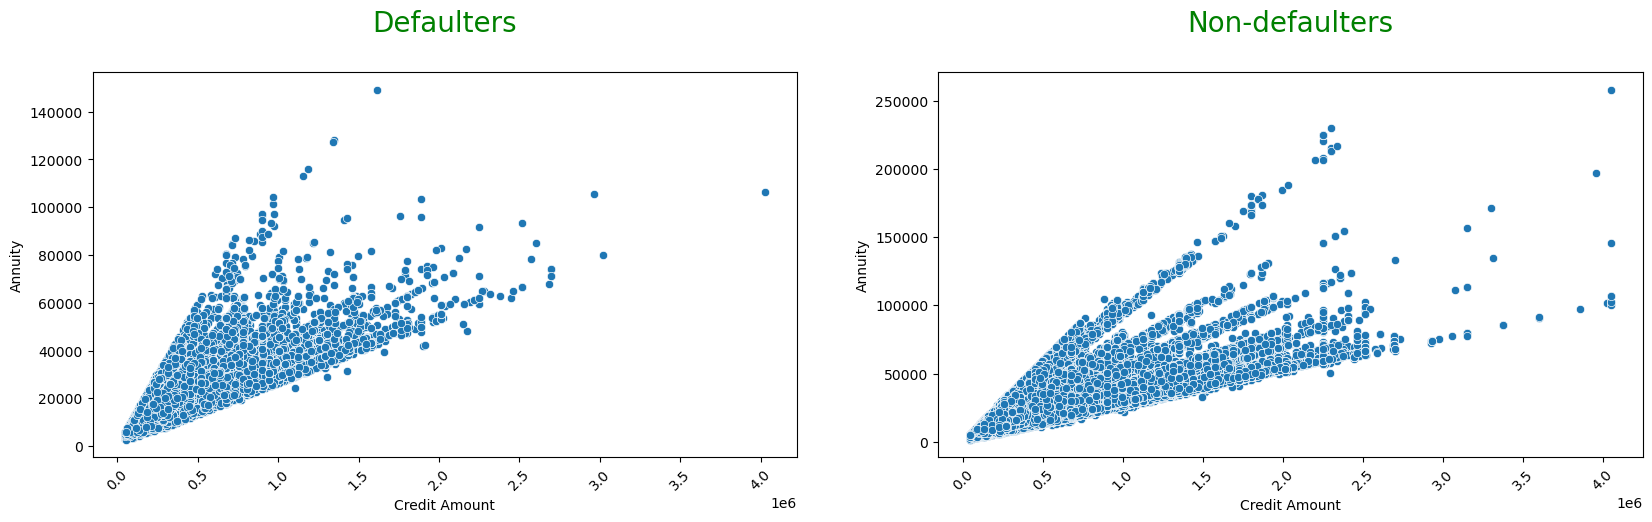

In [344]:
#  Graph for AMT_CREDIT-AMT_ANNUITY columns:
x_plot = 'AMT_CREDIT'
y_plot = 'AMT_ANNUITY'
xlabel = 'Credit Amount'
ylabel = 'Annuity'
continuous_vs_continuous_graph(x_plot, y_plot, xlabel, ylabel)

# The below graphs shows that there is positve correlation between both columns.

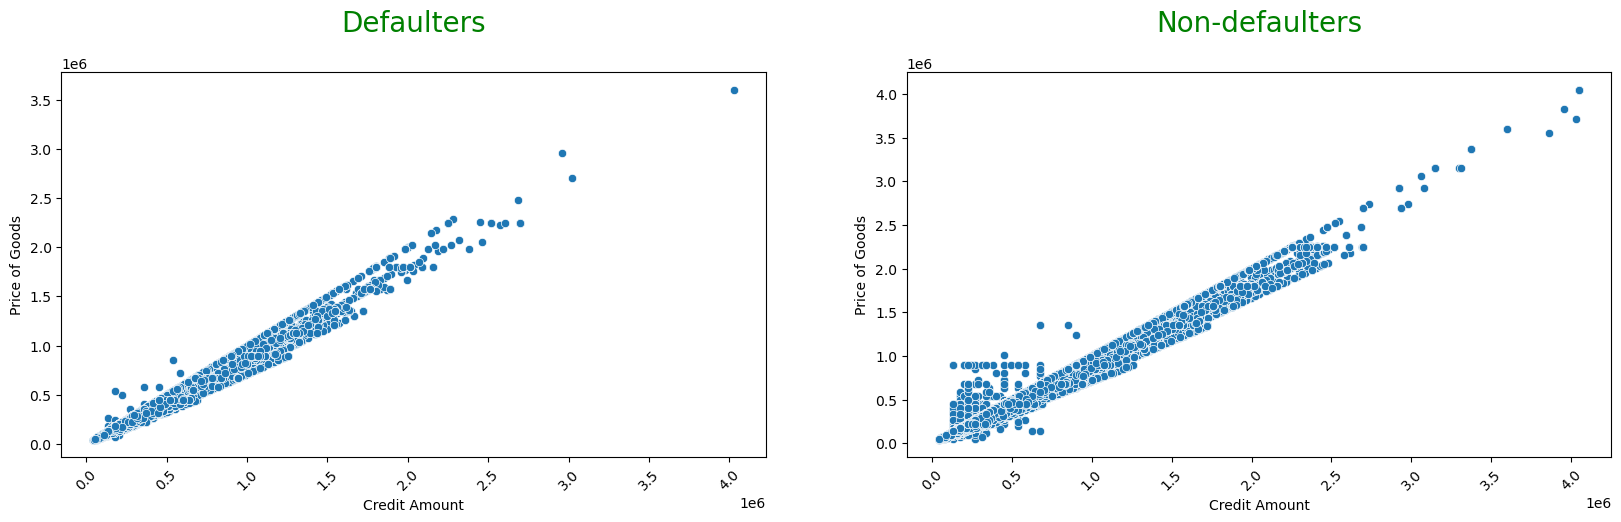

In [345]:
# Graph for AMT_CREDIT-AMT_GOODS_PRICE columns:
x_plot = 'AMT_CREDIT'
y_plot = 'AMT_GOODS_PRICE'
x_label = 'Credit Amount'
ylabel = 'Price of Goods'
continuous_vs_continuous_graph(x_plot, y_plot, x_label, ylabel)

# The below graphs shows that there is positve correlation between both columns.

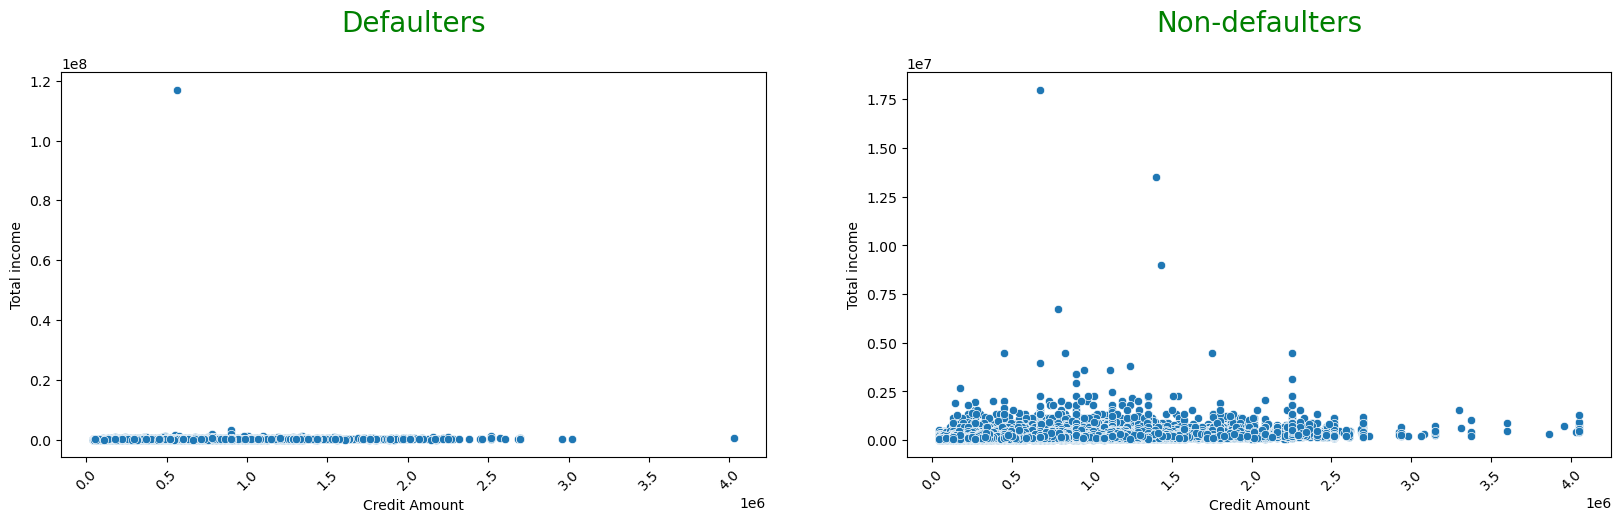

In [346]:
# Graph for AMT_CREDIT-AMT_INCOME_TOTAL columns:

x_plot = 'AMT_CREDIT'
y_plot = 'AMT_INCOME_TOTAL'
x_label = 'Credit Amount'
ylabel = 'Total income'
continuous_vs_continuous_graph(x_plot, y_plot, x_label, ylabel)

# The below graphs shows that there is positve correlation between both columns.

===================================================================================================================

## PREVIOUS LOAN APPLICATION DATASET :

In [347]:
# Reading the file:
df_previous = pd.read_csv('previous_application.csv')
df_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [348]:
df_previous.shape

(1670214, 37)

In [349]:
# information about the columns:
df_previous.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [350]:
# Numarical analysis on columns:
df_previous.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### Data Cleaning and Data Imputing:

In [351]:
# Missing values: 
round(100 * df_previous.isnull().mean(),1)

SK_ID_PREV                      0.0
SK_ID_CURR                      0.0
NAME_CONTRACT_TYPE              0.0
AMT_ANNUITY                    22.3
AMT_APPLICATION                 0.0
AMT_CREDIT                      0.0
AMT_DOWN_PAYMENT               53.6
AMT_GOODS_PRICE                23.1
WEEKDAY_APPR_PROCESS_START      0.0
HOUR_APPR_PROCESS_START         0.0
FLAG_LAST_APPL_PER_CONTRACT     0.0
NFLAG_LAST_APPL_IN_DAY          0.0
RATE_DOWN_PAYMENT              53.6
RATE_INTEREST_PRIMARY          99.6
RATE_INTEREST_PRIVILEGED       99.6
NAME_CASH_LOAN_PURPOSE          0.0
NAME_CONTRACT_STATUS            0.0
DAYS_DECISION                   0.0
NAME_PAYMENT_TYPE               0.0
CODE_REJECT_REASON              0.0
NAME_TYPE_SUITE                49.1
NAME_CLIENT_TYPE                0.0
NAME_GOODS_CATEGORY             0.0
NAME_PORTFOLIO                  0.0
NAME_PRODUCT_TYPE               0.0
CHANNEL_TYPE                    0.0
SELLERPLACE_AREA                0.0
NAME_SELLER_INDUSTRY        

In [352]:
# Droping columns with more than 45% data missing:
missing_values = list(filter(lambda x: x[1] > 45 , round(100 * df_previous.isnull().sum() / len(df_previous.index),2).iteritems()))

# Creating and adding the column names in a list:
unwanted_col = [i[0] for i in missing_values]
unwanted_col

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE']

In [353]:
# Droping the columns in the list:
df_previous.drop(unwanted_col, axis = 1, inplace = True)

df_previous.shape

(1670214, 32)

In [354]:
round(100 * df_previous.isnull().mean(),1)

SK_ID_PREV                      0.0
SK_ID_CURR                      0.0
NAME_CONTRACT_TYPE              0.0
AMT_ANNUITY                    22.3
AMT_APPLICATION                 0.0
AMT_CREDIT                      0.0
AMT_GOODS_PRICE                23.1
WEEKDAY_APPR_PROCESS_START      0.0
HOUR_APPR_PROCESS_START         0.0
FLAG_LAST_APPL_PER_CONTRACT     0.0
NFLAG_LAST_APPL_IN_DAY          0.0
NAME_CASH_LOAN_PURPOSE          0.0
NAME_CONTRACT_STATUS            0.0
DAYS_DECISION                   0.0
NAME_PAYMENT_TYPE               0.0
CODE_REJECT_REASON              0.0
NAME_CLIENT_TYPE                0.0
NAME_GOODS_CATEGORY             0.0
NAME_PORTFOLIO                  0.0
NAME_PRODUCT_TYPE               0.0
CHANNEL_TYPE                    0.0
SELLERPLACE_AREA                0.0
NAME_SELLER_INDUSTRY            0.0
CNT_PAYMENT                    22.3
NAME_YIELD_GROUP                0.0
PRODUCT_COMBINATION             0.0
DAYS_FIRST_DRAWING             40.3
DAYS_FIRST_DUE              

In [355]:
# Checking the column NFLAG_INSURED_ON_APPROVAL:
df_previous['NFLAG_INSURED_ON_APPROVAL'].describe()

# There are 40% missing values in this column so we can drop this column.

count    997149.000000
mean          0.332570
std           0.471134
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64

In [356]:
# There are columns which are having days as negative value which cannot be possible. So, taking absolute values for these negative values:
df_previous[['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION','DAYS_DECISION']].describe()

,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,DAYS_DECISION
count,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,1.670214e+06
mean,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,-8.806797e+02
std,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,7.790997e+02
min,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,-2.922000e+03
25%,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,-1.300000e+03
50%,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,-5.810000e+02
75%,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,-2.800000e+02
max,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,-1.000000e+00


In [357]:
# Create a column list for DAYS columns
col_list = ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION','DAYS_DECISION']

# Replace the values with their respective absolute values
for col in col_list:
    df_previous[col] = abs(df_previous[col])
    
# Verify the changes
df_previous[['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION','DAYS_DECISION']].describe()

,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,DAYS_DECISION
count,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,1.670214e+06
mean,342340.056543,15949.224065,35163.363265,78152.730207,83505.775017,8.806797e+02
std,88413.495220,72007.270877,106405.950190,148833.342466,152484.418802,7.790997e+02
min,2.000000,2.000000,0.000000,2.000000,2.000000,1.000000e+00
25%,365243.000000,475.000000,257.000000,455.000000,447.000000,2.800000e+02
50%,365243.000000,921.000000,741.000000,1155.000000,1171.000000,5.810000e+02
75%,365243.000000,1825.000000,1735.000000,2418.000000,2501.000000,1.300000e+03
max,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,2.922000e+03


### Checking for Outlier:

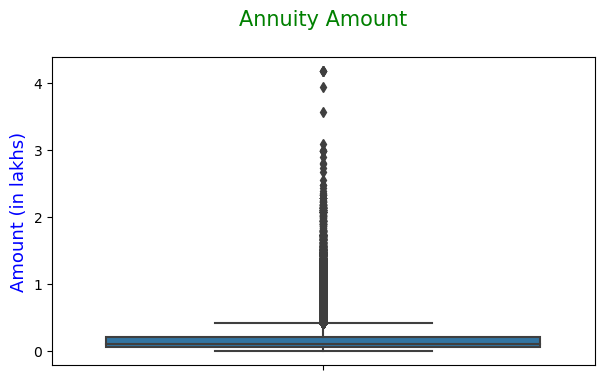

In [358]:
# Plotting graph for AMT_ANNUITY:
var = df_previous['AMT_ANNUITY']/100000
title = 'Annuity Amount\n'
label = 'Amount (in lakhs)'
plotting_outiers(var,title,label)

# In the below graph we can see that the values are continuous.

In [359]:
df_previous['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [360]:
# Check the quantiles values:
df_previous['AMT_ANNUITY'].quantile([0.5,0.7,0.90,0.95,0.99])

0.50    11250.0000
0.70    17783.1270
0.90    34703.8200
0.95    45336.7800
0.99    69685.7886
Name: AMT_ANNUITY, dtype: float64

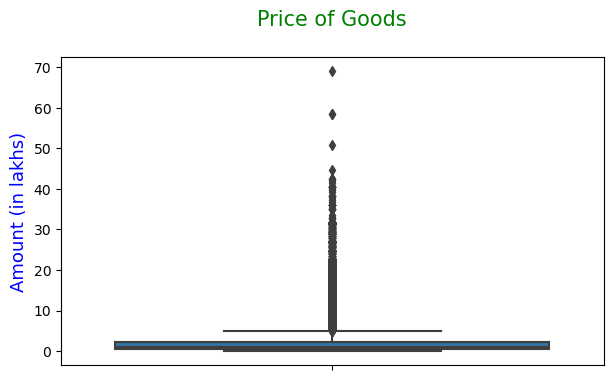

In [361]:
# Boxplot for AMT_GOODS_PRICE column:

var = df_previous['AMT_GOODS_PRICE']/100000
title = 'Price of Goods\n'
label = 'Amount (in lakhs)'

plotting_outiers(var,title,label)

In [362]:
df_previous['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [363]:
# Check the quantiles for the column AMT_GOODS_PRICE :
df_previous['AMT_GOODS_PRICE'].quantile([0.5,0.7,0.90,0.95,0.99])

# In this we need to cap values to ignore very high goods price.

0.50     112320.0
0.70     211500.0
0.90     585000.0
0.95     900000.0
0.99    1395000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [364]:
# Check summary

df_previous['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

=======================================================================================================================

## Combining Both PREVIOUS & PRESENT APPLICATION DATA:

### Merging the DataFrames:

In [365]:
# combining both the dataframes (df_application and df_previous):
merged_df = pd.merge(df_application, df_previous, on='SK_ID_CURR', how = 'inner')

merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,INCOME_GROUP,CREDIT_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,20-30,2-5L,1-5L,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,40-50,2-5L,10-20L,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,40-50,2-5L,10-20L,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,

In [366]:
merged_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 115 columns):
 #    Column                        Dtype   
---   ------                        -----   
 0    SK_ID_CURR                    int64   
 1    TARGET                        int64   
 2    NAME_CONTRACT_TYPE_x          object  
 3    CODE_GENDER                   object  
 4    FLAG_OWN_CAR                  object  
 5    FLAG_OWN_REALTY               object  
 6    CNT_CHILDREN                  int64   
 7    AMT_INCOME_TOTAL              float64 
 8    AMT_CREDIT_x                  float64 
 9    AMT_ANNUITY_x                 float64 
 10   AMT_GOODS_PRICE_x             float64 
 11   NAME_TYPE_SUITE               object  
 12   NAME_INCOME_TYPE              object  
 13   NAME_EDUCATION_TYPE           object  
 14   NAME_FAMILY_STATUS            object  
 15   NAME_HOUSING_TYPE             object  
 16   REGION_POPULATION_RELATIVE    float64 
 17   DAYS_BIRTH               

In [367]:
# Rename the duplicated columns

merged_df = merged_df.rename({'NAME_CONTRACT_TYPE_y':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_ANNUITY_y':'AMT_ANNUITY_PREV',
                        'AMT_CREDIT_y':'AMT_CREDIT_PREV',
                         'AMT_GOODS_PRICE_y':'AMT_GOODS_PRICE_PREV',
                         'NAME_TYPE_SUITE_y':'NAME_TYPE_SUITE_PREV',
                         'NAME_TYPE_SUITE_x':'NAME_TYPE_SUITE_CURR',
                         'AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE_CURR',
                         'AMT_ANNUITY_x':'AMT_ANNUITY_CURR',
                         'AMT_CREDIT_x':'AMT_CREDIT_CURR',
                         'NAME_CONTRACT_TYPE_x':'NAME_CONTRACT_TYPE_CURR'}, axis=1)

In [368]:
merged_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 115 columns):
 #    Column                        Dtype   
---   ------                        -----   
 0    SK_ID_CURR                    int64   
 1    TARGET                        int64   
 2    NAME_CONTRACT_TYPE_CURR       object  
 3    CODE_GENDER                   object  
 4    FLAG_OWN_CAR                  object  
 5    FLAG_OWN_REALTY               object  
 6    CNT_CHILDREN                  int64   
 7    AMT_INCOME_TOTAL              float64 
 8    AMT_CREDIT_CURR               float64 
 9    AMT_ANNUITY_CURR              float64 
 10   AMT_GOODS_PRICE_CURR          float64 
 11   NAME_TYPE_SUITE               object  
 12   NAME_INCOME_TYPE              object  
 13   NAME_EDUCATION_TYPE           object  
 14   NAME_FAMILY_STATUS            object  
 15   NAME_HOUSING_TYPE             object  
 16   REGION_POPULATION_RELATIVE    float64 
 17   DAYS_BIRTH               

In [369]:
# Droping unwanted columns:
merged_df.drop(['REGION_POPULATION_RELATIVE','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 
              'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
              'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
              'LIVE_CITY_NOT_WORK_CITY', 'YEARS_BEGINEXPLUATATION_AVG','YEARS_BEGINEXPLUATATION_MEDI',
              'YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_AVG','FLOORSMAX_MODE','FLOORSMAX_MEDI','EMERGENCYSTATE_MODE',
              'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
             'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
              'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR',
             'DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION',
             'NFLAG_INSURED_ON_APPROVAL', 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5', 
              'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
              'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11',
              'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
              'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',
              'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE','FLAG_CONT_MOBILE', 
              'FLAG_PHONE','FLAG_EMAIL', 'EXT_SOURCE_2',
              'EXT_SOURCE_3', 'TOTALAREA_MODE','FLAG_LAST_APPL_PER_CONTRACT',
              'NFLAG_LAST_APPL_IN_DAY', 'SELLERPLACE_AREA','WEEKDAY_APPR_PROCESS_START_x',
              'WEEKDAY_APPR_PROCESS_START_y','HOUR_APPR_PROCESS_START_x','HOUR_APPR_PROCESS_START_y'],axis=1,inplace=True)

In [370]:
# Confirming the dropped columns:
merged_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 46 columns):
 #   Column                   Non-Null Count    Dtype   
---  ------                   --------------    -----   
 0   SK_ID_CURR               1413701 non-null  int64   
 1   TARGET                   1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_CURR  1413701 non-null  object  
 3   CODE_GENDER              1413646 non-null  object  
 4   FLAG_OWN_CAR             1413701 non-null  object  
 5   FLAG_OWN_REALTY          1413701 non-null  object  
 6   CNT_CHILDREN             1413701 non-null  int64   
 7   AMT_INCOME_TOTAL         1413701 non-null  float64 
 8   AMT_CREDIT_CURR          1413701 non-null  float64 
 9   AMT_ANNUITY_CURR         1413608 non-null  float64 
 10  AMT_GOODS_PRICE_CURR     1412493 non-null  float64 
 11  NAME_TYPE_SUITE          1410175 non-null  object  
 12  NAME_INCOME_TYPE         1413701 non-null  object  
 13  NAME_EDUCATION_TYPE      14

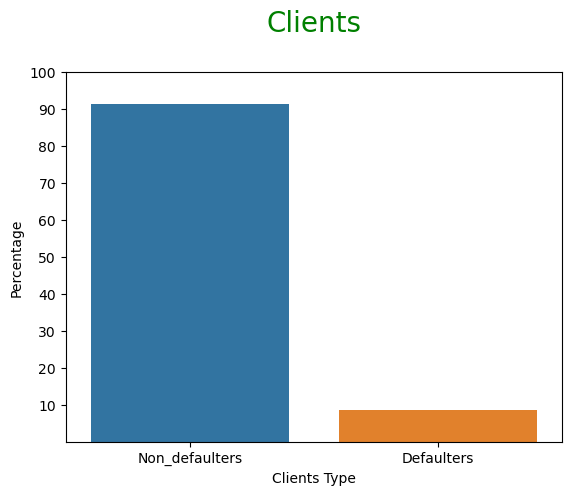

In [371]:
# Inspecting the values in TARGET column:
repay_status = merged_df['TARGET'].value_counts(normalize=True)*100

x_list= ['Non_defaulters','Defaulters']
axes= plt.axes()
axes.set_ylim([0,100])
axes.set_yticks([10,20,30,40,50,60,70,80,90,100])

sns.barplot(x=x_list, y=repay_status)
plt.title('Clients\n', fontdict={'fontsize': 20, 'fontweight' : 6, 'color' : 'Green'})
plt.xlabel("Clients Type")
plt.ylabel("Percentage")

plt.show()

### Univariate Analysis of columns:

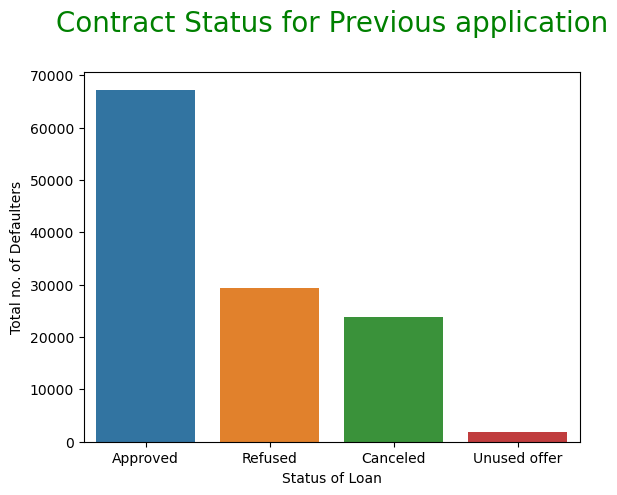

In [372]:
# Taking column NAME_CONTRACT_STATUS:
df_temporary = merged_df[['TARGET','NAME_CONTRACT_STATUS']].groupby(['NAME_CONTRACT_STATUS'], as_index=False).sum()
df_temporary.sort_values(by='TARGET', ascending=False, inplace=True)

sns.barplot(x='NAME_CONTRACT_STATUS', y = 'TARGET', data = df_temporary)
plt.title('Contract Status for Previous application\n',fontdict={'fontsize': 20, 'fontweight' : 6, 'color' : 'Green'} )
plt.xlabel('Status of Loan')
plt.ylabel('Total no. of Defaulters')
plt.xticks(rotation=0)

plt.show()

From the above graph we can clearly say that there are high numbers of defaulters in the application apporved catagory.

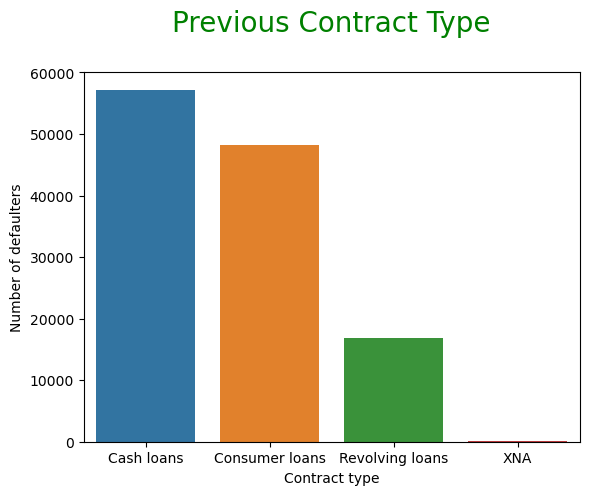

In [373]:
# Ploting Graph for NAME_CONTRACT_TYPE_PREV Column:
df_temporary = merged_df[['TARGET','NAME_CONTRACT_TYPE_PREV']].groupby(['NAME_CONTRACT_TYPE_PREV'], as_index=False).sum()
df_temporary.sort_values(by='TARGET', ascending=False, inplace=True)

sns.barplot(x='NAME_CONTRACT_TYPE_PREV', y = 'TARGET', data = df_temporary)
plt.title('Previous Contract Type\n',fontdict={'fontsize': 20, 'fontweight' : 6, 'color' : 'Green'})
plt.xlabel('Contract type')
plt.ylabel('Number of defaulters')
plt.xticks(rotation=0)

plt.show()

There are more no. of defaulters in the cash loans then other loan types.

#### Continuous columns:

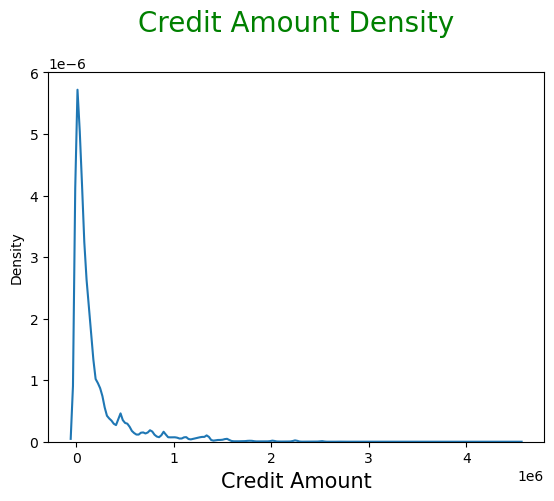

In [374]:
# Creating a distplot for AMT_CREDIT_PREV column:
sns.distplot(merged_df['AMT_CREDIT_PREV'] , hist=False)
plt.title('Credit Amount Density\n', fontdict={'fontsize': 20, 'fontweight' : 6, 'color' : 'Green'})
plt.xlabel('Credit Amount', fontdict={'fontsize': 15})
plt.show()

# From the graph we can clearly say that in the past, most of the loans had credit amount less than 1lacs.

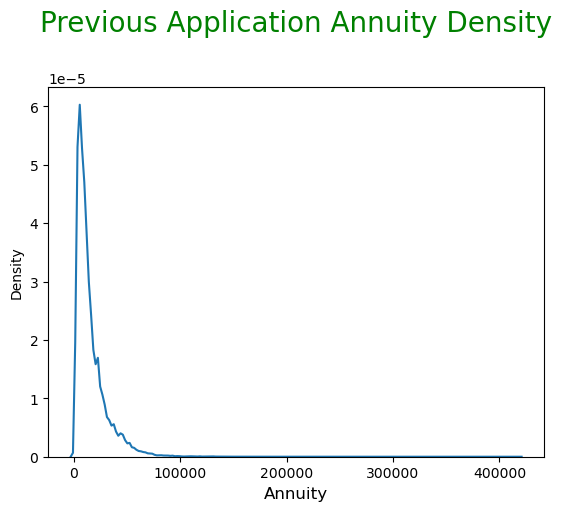

In [375]:
# Distplot for AMT_ANNUITY_PREV column:
sns.distplot(merged_df['AMT_ANNUITY_PREV'] , hist=False)
plt.title('Previous Application Annuity Density\n', fontdict={'fontsize': 20, 'fontweight' : 6, 'color' : 'Green'})
plt.xlabel('Annuity', fontdict={'fontsize': 12})
plt.show()

# From the below graph we can say that density of annuity is mostly below 1lacs.

### Bivariate Analysis of the column:

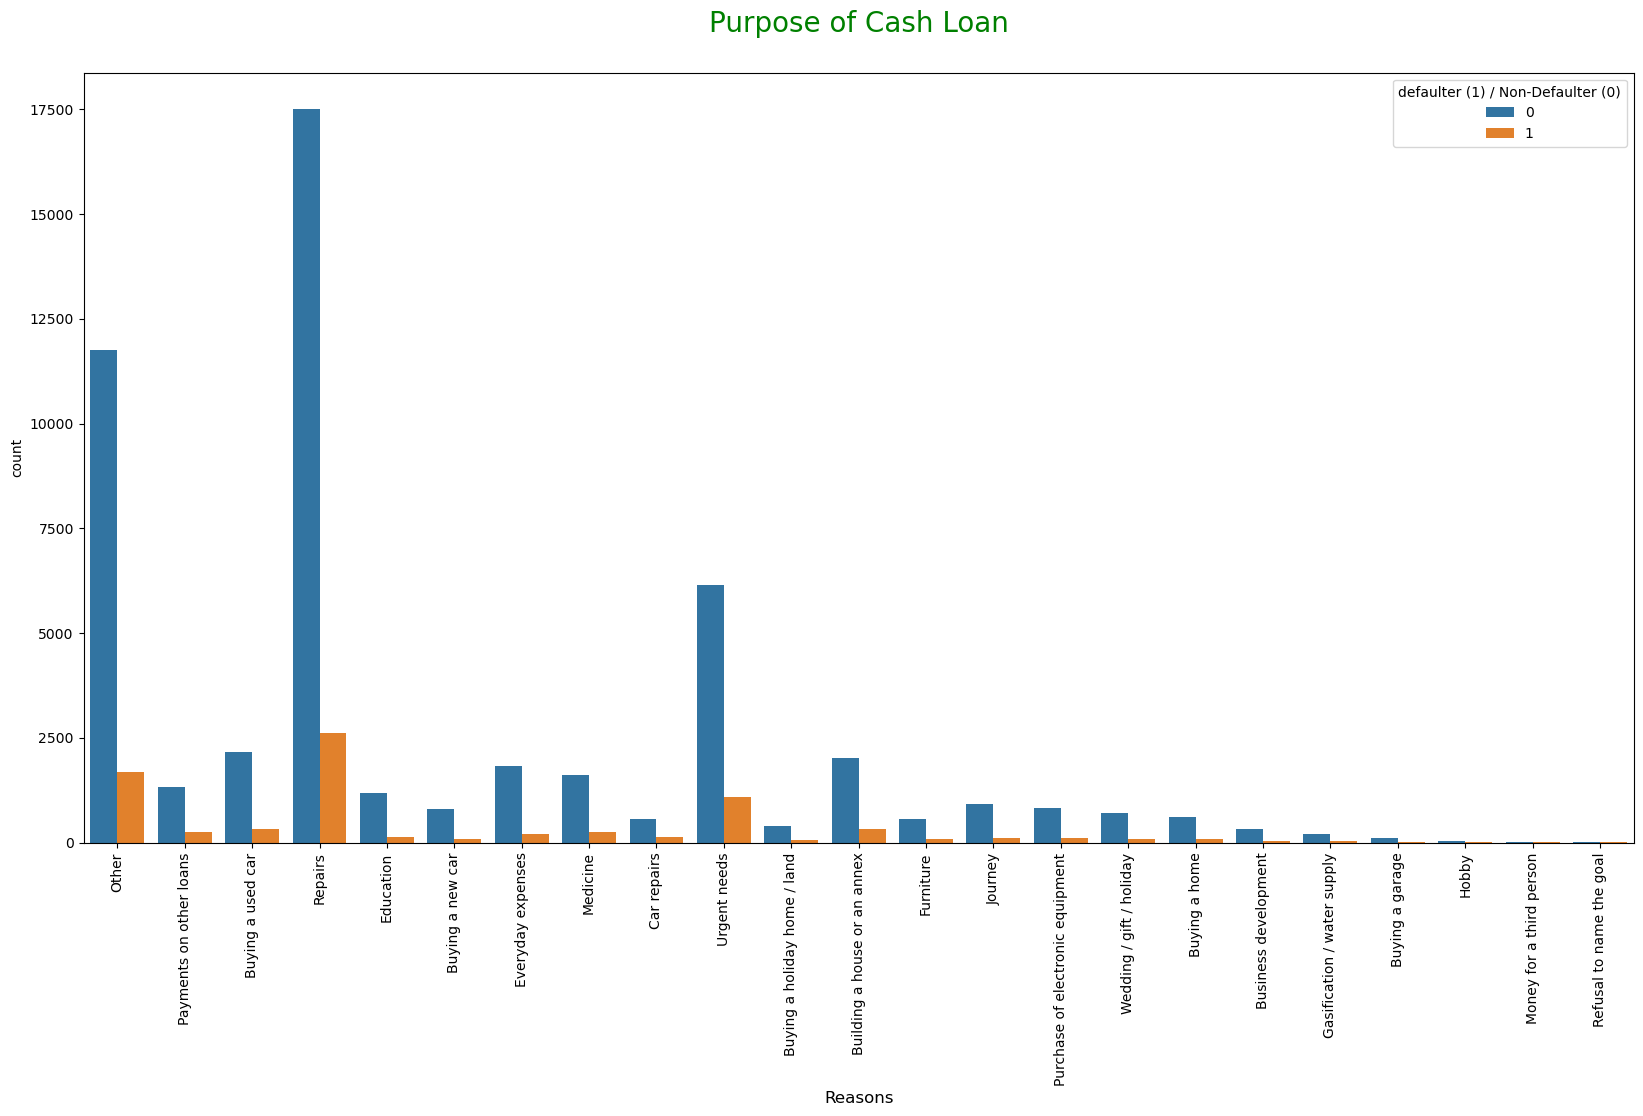

In [376]:
df_temporary = merged_df[merged_df['NAME_CASH_LOAN_PURPOSE'] != 'XAP']
df_temporary = df_temporary[df_temporary['NAME_CASH_LOAN_PURPOSE'] != 'XNA']
plt.figure(figsize=[20,10])
plt.title('Purpose of Cash Loan\n', fontdict={'fontsize': 20, 'fontweight' : 6, 'color' : 'Green'})
sns.countplot(x=df_temporary['NAME_CASH_LOAN_PURPOSE'],hue=df_temporary['TARGET'])
plt.xlabel('Reasons', fontdict={'fontsize': 12})
plt.xticks(rotation = 90)
plt.legend(title='defaulter (1) / Non-Defaulter (0)', loc= 'upper right')
plt.show()

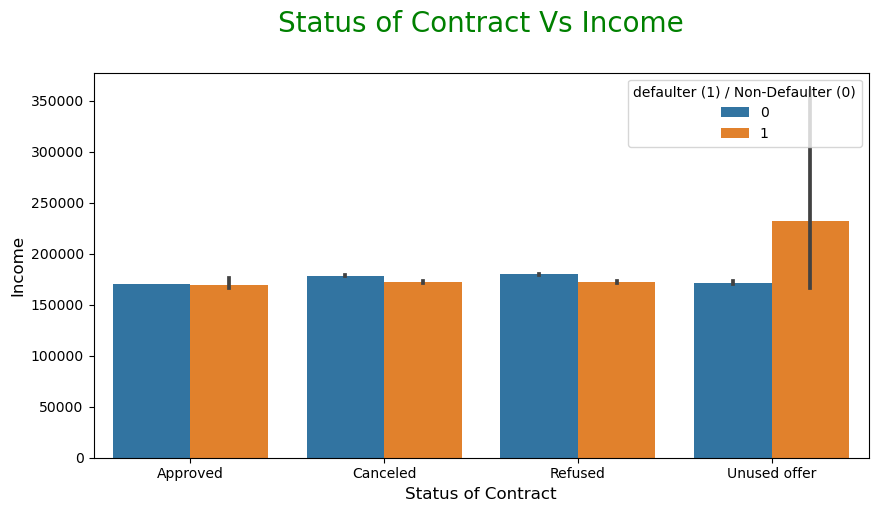

In [377]:
plt.figure(figsize=(10,5))
plt.title('Status of Contract Vs Income\n', fontdict={'fontsize': 20, 'fontweight' : 6, 'color' : 'Green'})
sns.barplot(x=merged_df['NAME_CONTRACT_STATUS'], y=merged_df['AMT_INCOME_TOTAL'], hue=merged_df['TARGET'] )
plt.xlabel('Status of Contract', fontdict={'fontsize': 12})
plt.ylabel('Income', fontdict={'fontsize': 12})
plt.legend(title='defaulter (1) / Non-Defaulter (0)', loc= 'upper right')
plt.show()

# The below graph clearly shows that the people who are having unused offers are more likely to default instead of high salary.

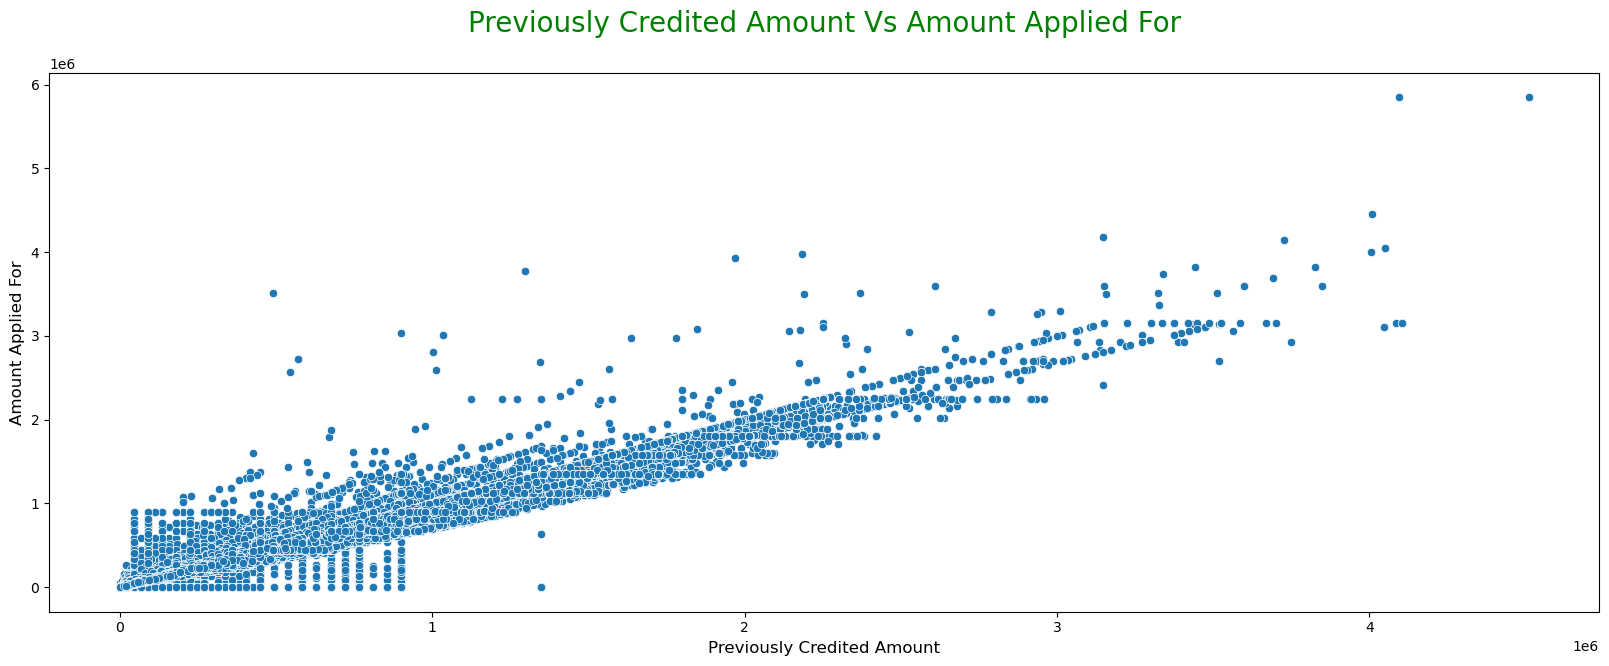

In [378]:
# Creating a Scatterplot for continuous values:
plt.figure(figsize=[20,7])
plt.title('Previously Credited Amount Vs Amount Applied For\n', fontdict={'fontsize': 20, 'fontweight' : 6, 'color' : 'Green'})
sns.scatterplot(x = merged_df['AMT_CREDIT_PREV'], y = merged_df['AMT_APPLICATION'])
plt.xlabel('Previously Credited Amount', fontdict={'fontsize': 12})
plt.ylabel('Amount Applied For', fontdict={'fontsize': 12})
plt.show()

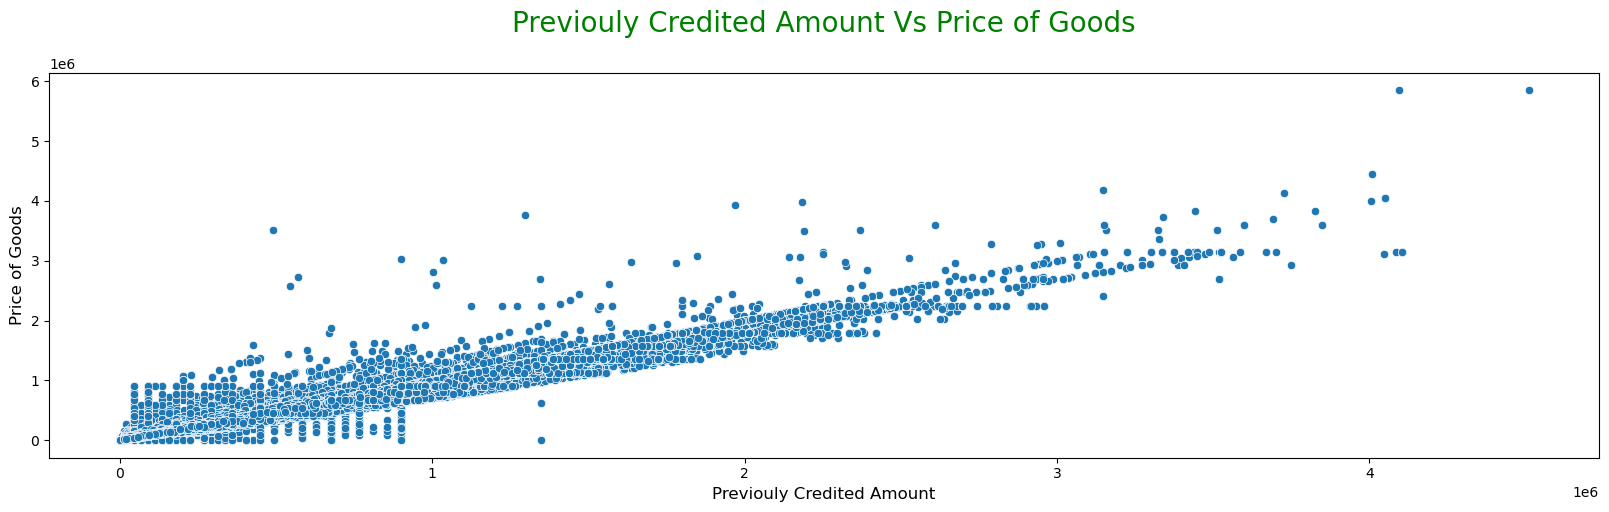

In [379]:
# Creating a Scatterplot for continuous values:
plt.figure(figsize=[20,5])
plt.title('Previouly Credited Amount Vs Price of Goods\n', fontdict={'fontsize': 20, 'fontweight' : 6, 'color' : 'Green'})
sns.scatterplot(x = merged_df['AMT_CREDIT_PREV'], y = merged_df['AMT_GOODS_PRICE_PREV'])
plt.xlabel('Previouly Credited Amount', fontdict={'fontsize': 12})
plt.ylabel('Price of Goods', fontdict={'fontsize': 12})
plt.show()

From the above graph we can clearly say that the previous credited amount is directly correlated to price of goods.

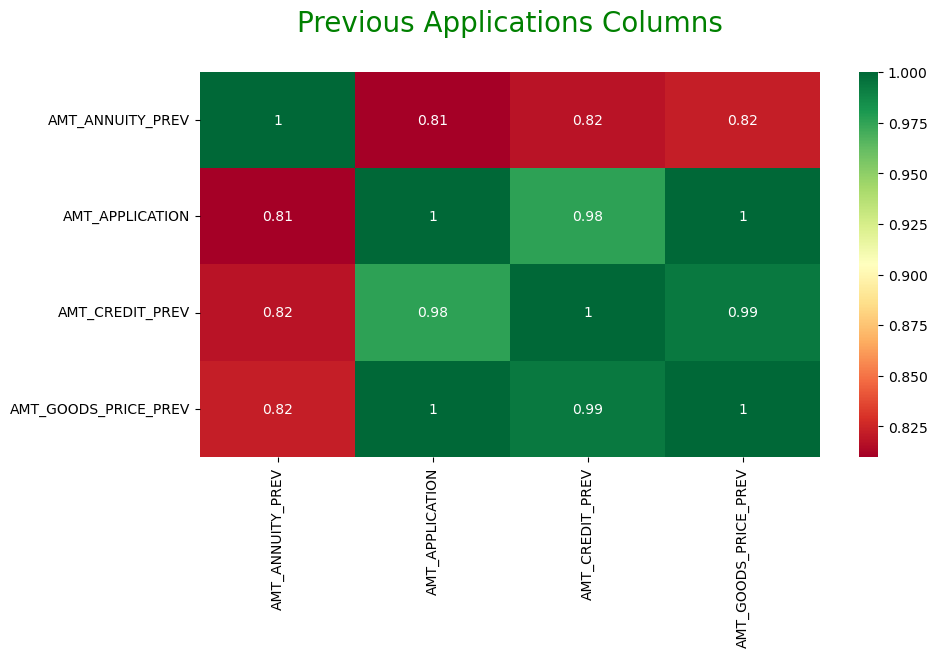

In [380]:
correlation_df = merged_df[['AMT_ANNUITY_PREV','AMT_APPLICATION','AMT_CREDIT_PREV','AMT_GOODS_PRICE_PREV']].corr()
correlation_df

# Heatmap for the variables:
plt.figure(figsize=[10,5])
sns.heatmap(correlation_df, cmap="RdYlGn", annot = True)
plt.title('Previous Applications Columns\n', fontdict={'fontsize': 20, 'fontweight' : 6, 'color' : 'Green'})
plt.show()

===================================================================================================================